In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import rcParams
from matplotlib import ticker
rcParams["figure.figsize"] = (10,8)
plt.style.use("science")
import eispac
from glob import glob
import sunpy
from sunpy.io.special import read_genx
from sunpy.image.coalignment import calculate_shift
import sunpy.coordinates
import cmcrameri.cm as cmcm
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from astropy.visualization import ImageNormalize, SqrtStretch, LogStretch
from scipy import interpolate
from scipy import ndimage
import juanfit
from juanfit import SpectrumFitSingle, SpectrumFitRow
rcParams['axes.labelsize'] = 18
rcParams['xtick.labelsize'] = 16
rcParams['ytick.labelsize'] = 16
rcParams['font.size'] = 18
rcParams['figure.figsize'] = [10,10]
rcParams['axes.linewidth'] = 2
from scipy.interpolate import interp1d
import astropy.constants as const
import astropy.units as u
from astropy.coordinates import SkyCoord


In [2]:
def plot_colorbar(im, ax, width="3%", height="100%",loc="lower left",fontsize=14,
                bbox_to_anchor=(1.02, 0., 1, 1)):
    clb_ax = inset_axes(ax,width=width,height=height,loc=loc,
                bbox_to_anchor=bbox_to_anchor,
                 bbox_transform=ax.transAxes,
                 borderpad=0)
    clb = plt.colorbar(im,pad = 0.05,orientation='vertical',ax=ax,cax=clb_ax)
    clb_ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(5))
    clb_ax.yaxis.get_offset_text().set_fontsize(fontsize)
    clb_ax.tick_params(labelsize=fontsize)
    return clb, clb_ax

In [3]:
data_filepath = '../../src/EIS/level1/EastOffLimbFullSpectra/eis_20170821_205401.data.h5'
fe_10_184_fit_file = "../../sav/EIS/EQSPY/eispac_fit/eis_20170821_205401.fe_10_184_536.1c-0.fit.h5"
fe_10_257_fit_file = "../../sav/EIS/EQSPY/eispac_fit/eis_20170821_205401.fe_10_257_262.4c-1.fit.h5"
fe_11_188_fit_file = "../../sav/EIS/EQSPY/eispac_fit/eis_20170821_205401.fe_11_188_216.2c-0.fit.h5"
fe_11_257_fit_file = "../../sav/EIS/EQSPY/eispac_fit/eis_20170821_205401.fe_11_257_547.4c-3.fit.h5"
fe_12_186_fit_file = "../../sav/EIS/EQSPY/eispac_fit/eis_20170821_205401.fe_12_186_880.1c-0.fit.h5"
fe_12_192_fit_file = "../../sav/EIS/EQSPY/eispac_fit/eis_20170821_205401.fe_12_192_394.1c-0.fit.h5"
fe_12_195_fit_file = "../../sav/EIS/EQSPY/eispac_fit/eis_20170821_205401.fe_12_195_119.2c-0.fit.h5"
fe_14_264_fit_file = "../../sav/EIS/EQSPY/eispac_fit/eis_20170821_205401.fe_14_264_787.1c-0.fit.h5"
si_10_258_fit_file = "../../sav/EIS/EQSPY/eispac_fit/eis_20170821_205401.si_10_258_375.1c-0.fit.h5"
si_10_261_fit_file = "../../sav/EIS/EQSPY/eispac_fit/eis_20170821_205401.si_10_261_058.1c-0.fit.h5"

In [73]:
aia_193_map = sunpy.map.Map("../../src/AIA/AIA20170821_210952_0193.fits")

Reading fit result from, 
   ../../sav/EIS/EQSPY/eispac_fit/eis_20170821_205401.fe_10_184_536.1c-0.fit.h5
INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


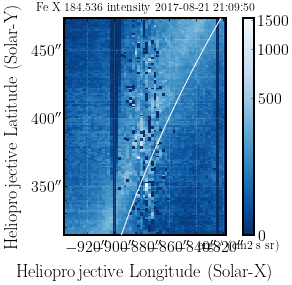

In [6]:
rcParams['figure.figsize'] = [10,10]
fe_10_184_fit_res = eispac.read_fit(fe_10_184_fit_file)
fe_10_184_inten_map = fe_10_184_fit_res.get_map(component=0, measurement='intensity')
fe_10_184_inten_map.peek(draw_limb=True)

INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


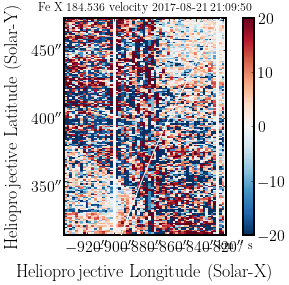

In [7]:
fe_10_184_vel_map = fe_10_184_fit_res.get_map(0, 'vel')
fe_10_184_vel_map.plot_settings['norm'] = ImageNormalize(vmin=-20, vmax=20)
fe_10_184_vel_map.peek(draw_limb=True)

INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


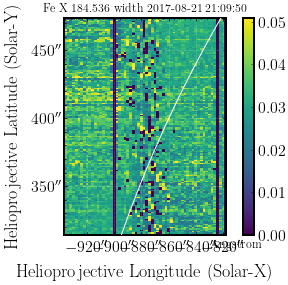

In [8]:
fe_10_184_width_map = fe_10_184_fit_res.get_map(0, 'width')
fe_10_184_width_map.peek(draw_limb=True)

Reading fit result from, 
   ../../sav/EIS/EQSPY/eispac_fit/eis_20170821_205401.fe_10_257_262.4c-1.fit.h5
INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


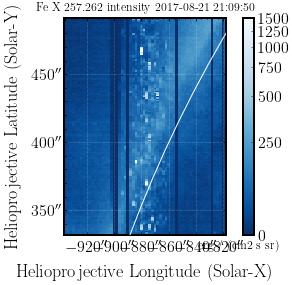

In [9]:
fe_10_257_fit_res = eispac.read_fit(fe_10_257_fit_file)
fe_10_257_inten_map = fe_10_257_fit_res.get_map(component=1, measurement='intensity')
fe_10_257_inten_map.peek(draw_limb=True,vmax=1500)

Reading fit result from, 
   ../../sav/EIS/EQSPY/eispac_fit/eis_20170821_205401.fe_11_188_216.2c-0.fit.h5
INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


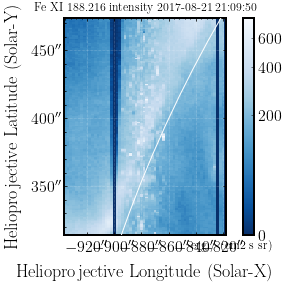

In [10]:
fe_11_188_fit_res = eispac.read_fit(fe_11_188_fit_file)
fe_11_188_inten_map = fe_11_188_fit_res.get_map(component=0, measurement='intensity')
fe_11_188_inten_map.peek(draw_limb=True)

Reading fit result from, 
   ../../sav/EIS/EQSPY/eispac_fit/eis_20170821_205401.fe_10_257_262.4c-1.fit.h5
INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


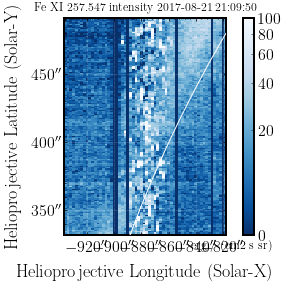

In [11]:
fe_11_257_fit_res = eispac.read_fit(fe_10_257_fit_file)
fe_11_257_inten_map = fe_11_257_fit_res.get_map(component=3, measurement='intensity')
fe_11_257_inten_map.peek(draw_limb=True,vmax=1e2)

Reading fit result from, 
   ../../sav/EIS/EQSPY/eispac_fit/eis_20170821_205401.fe_12_186_880.1c-0.fit.h5
INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


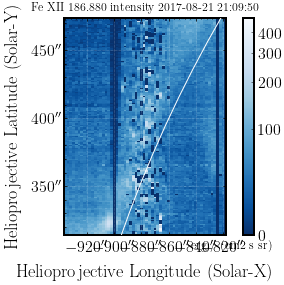

In [12]:
fe_12_186_fit_res = eispac.read_fit(fe_12_186_fit_file)
fe_12_186_inten_map = fe_12_186_fit_res.get_map(component=0, measurement='intensity')
fe_12_186_inten_map.peek(draw_limb=True)

INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


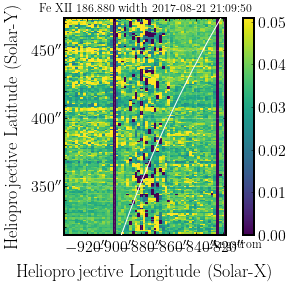

In [13]:
fe_12_186_width_map = fe_12_186_fit_res.get_map(component=0, measurement='width')
fe_12_186_width_map.peek(draw_limb=True)

Reading fit result from, 
   ../../sav/EIS/EQSPY/eispac_fit/eis_20170821_205401.fe_12_192_394.1c-0.fit.h5
INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


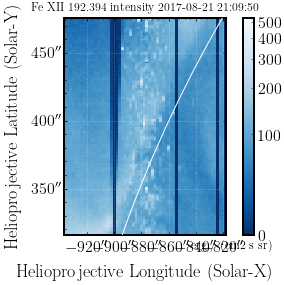

In [14]:
fe_12_192_fit_res = eispac.read_fit(fe_12_192_fit_file)
fe_12_192_inten_map = fe_12_192_fit_res.get_map(component=0, measurement='intensity')
fe_12_192_inten_map.peek(draw_limb=True)

Reading fit result from, 
   ../../sav/EIS/EQSPY/eispac_fit/eis_20170821_205401.fe_12_195_119.2c-0.fit.h5
INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


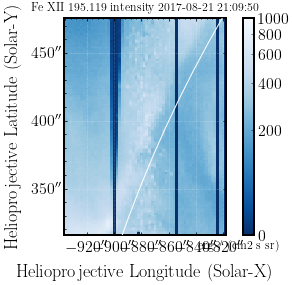

In [15]:
fe_12_195_fit_res = eispac.read_fit(fe_12_195_fit_file)
fe_12_195_inten_map = fe_12_195_fit_res.get_map(component=0, measurement='intensity')
fe_12_195_inten_map.peek(draw_limb=True,vmax=1e3)

In [74]:
n_x = (aia_193_map.scale.axis1 * aia_193_map.dimensions.x)/fe_12_195_inten_map.scale.axis1
n_y = (aia_193_map.scale.axis2 * aia_193_map.dimensions.y)/fe_12_195_inten_map.scale.axis2
aia_193_map_r = aia_193_map.resample(u.Quantity([n_x, n_y]))

In [75]:
yshift, xshift = calculate_shift(aia_193_map_r.data, fe_12_195_inten_map.data)

In [76]:
reference_coord = aia_193_map_r.pixel_to_world(xshift, yshift)

In [77]:
Txshift = reference_coord.Tx - fe_12_195_inten_map.bottom_left_coord.Tx
Tyshift = reference_coord.Ty - fe_12_195_inten_map.bottom_left_coord.Ty

print(Txshift, Tyshift)

-10.2164arcsec -40.8143arcsec


INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


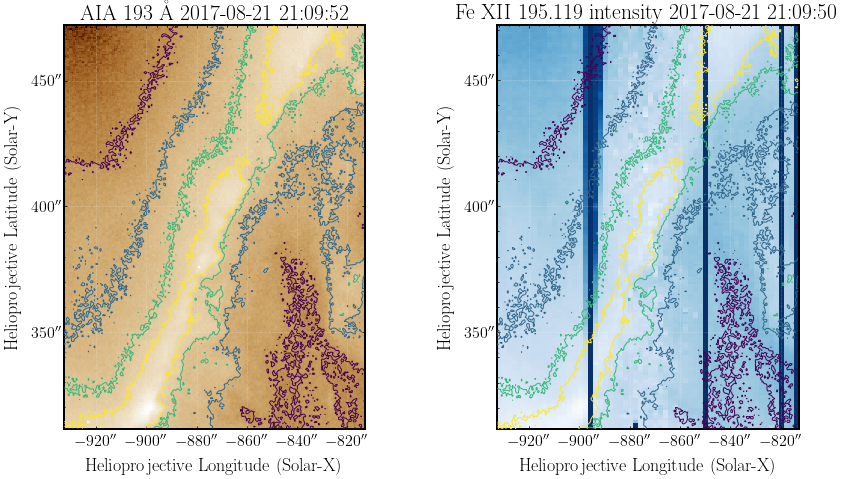

In [95]:
fe_12_195_inten_map_shifted = fe_12_195_inten_map.shift(4.5*u.arcsec, -4*u.arcsec)

eis_fov_width = fe_12_195_inten_map_shifted.dimensions.x*fe_12_195_inten_map_shifted.scale.axis1
eis_fov_height = fe_12_195_inten_map_shifted.dimensions.y*fe_12_195_inten_map_shifted.scale.axis2

with sunpy.coordinates.Helioprojective.assume_spherical_screen(aia_193_map.observer_coordinate,only_off_disk=True):
    eis_center = fe_12_195_inten_map_shifted.center.transform_to(aia_193_map.coordinate_frame)

    aia_193_map_crop = aia_193_map.submap(SkyCoord(eis_center.Tx - eis_fov_width/2., 
                                                        eis_center.Ty - eis_fov_height/2., frame=eis_center.frame),
                                                        width=eis_fov_width, height=eis_fov_height)

    fig = plt.figure(figsize=(12,6),constrained_layout=True)
    ax1 = fig.add_subplot(1,2,1,projection=aia_193_map_crop)
    aia_193_map_crop.plot(axes=ax1)

    ax2 = fig.add_subplot(1,2,2,projection=fe_12_195_inten_map_shifted)
    fe_12_195_inten_map_shifted.plot(axes=ax2)

    for ax_ in (ax1,ax2):
        aia_193_map_crop.draw_contours([200,300,400,500]*aia_193_map_crop.unit,axes=ax_,alpha=1,zorder=15,
                                   )

In [102]:
fe_12_195_inten_map_shifted.center

<SkyCoord (Helioprojective: obstime=2017-08-21T21:09:50.000, rsun=695700.0 km, observer=<HeliographicStonyhurst Coordinate (obstime=2017-08-21T21:09:50.000, rsun=695700.0 km): (lon, lat, radius) in (deg, deg, m)
    (8.71063623e-15, 6.93331769, 1.51320798e+11)>): (Tx, Ty) in arcsec
    (-872.8609095, 391.88154136)>

In [96]:
fe_12_195_inten_map_shifted.center.transform_to(aia_193_map.coordinate_frame)

<SkyCoord (Helioprojective: obstime=2017-08-21T21:09:52.840, rsun=696000.0 km, observer=<HeliographicStonyhurst Coordinate (obstime=2017-08-21T21:09:52.840, rsun=696000.0 km): (lon, lat, radius) in (deg, deg, m)
    (-0.00640278, 6.9387845, 1.51284183e+11)>): (Tx, Ty, distance) in (arcsec, arcsec, m)
    (nan, nan, nan)>

In [98]:
with sunpy.coordinates.Helioprojective.assume_spherical_screen(aia_193_map.observer_coordinate,only_off_disk=True):
    print(fe_12_195_inten_map_shifted.center.transform_to(aia_193_map.coordinate_frame))

<SkyCoord (Helioprojective: obstime=2017-08-21T21:09:52.840, rsun=696000.0 km, observer=<HeliographicStonyhurst Coordinate (obstime=2017-08-21T21:09:52.840, rsun=696000.0 km): (lon, lat, radius) in (deg, deg, m)
    (-0.00640278, 6.9387845, 1.51284183e+11)>): (Tx, Ty, distance) in (arcsec, arcsec, m)
    (-873.07777654, 391.96471182, 1.51284183e+11)>


/anaconda3/lib/python3.7/site-packages/eispac/core/eisfitresult.py:426: RuntimeWarning: invalid value encountered in true_divide
  rel_error = obs_errs/obs_cent


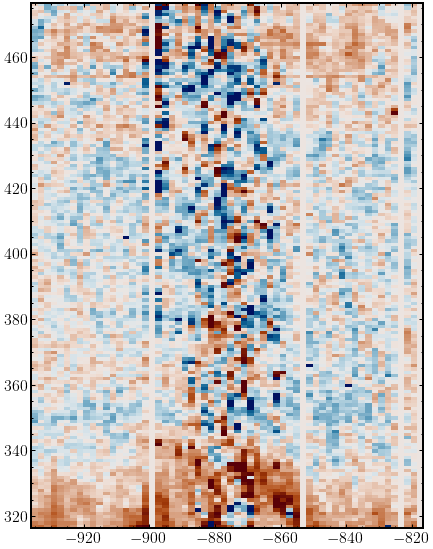

In [12]:
fig, ax = plt.subplots(figsize=(6,10),constrained_layout=True)
ax.imshow(fe_12_195_fit_res.calculate_velocity()[0],origin="lower",vmin=-10,vmax=10,cmap=cmcm.vik,extent=fe_12_195_fit_res.meta["extent_arcsec"])

Reading fit result from, 
   ../../sav/EIS/EQSPY/eispac_fit/eis_20170821_205401.fe_12_195_119.2c-0.fit.h5
INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


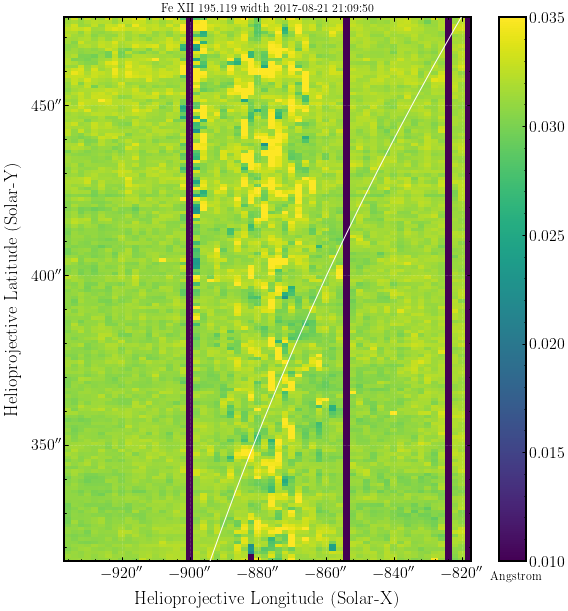

In [13]:
rcParams['figure.figsize'] = [10,10]
fe_12_195_fit_res = eispac.read_fit(fe_12_195_fit_file)
fe_12_195_width_map = fe_12_195_fit_res.get_map(component=0, measurement='width')
fe_12_195_width_map.peek(draw_limb=True,vmin=0.01,vmax=0.035)

Reading fit result from, 
   ../../sav/EIS/EQSPY/eispac_fit/eis_20170821_205401.si_10_258_375.1c-0.fit.h5
INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


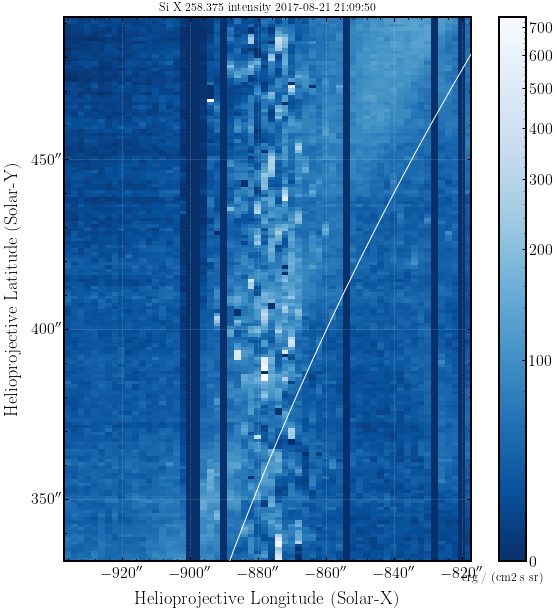

In [14]:
si_10_258_fit_res = eispac.read_fit(si_10_258_fit_file)
si_10_258_inten_map = si_10_258_fit_res.get_map(component=0, measurement='intensity')
si_10_258_inten_map.peek(draw_limb=True)

Reading fit result from, 
   ../../sav/EIS/EQSPY/eispac_fit/eis_20170821_205401.si_10_261_058.1c-0.fit.h5
INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


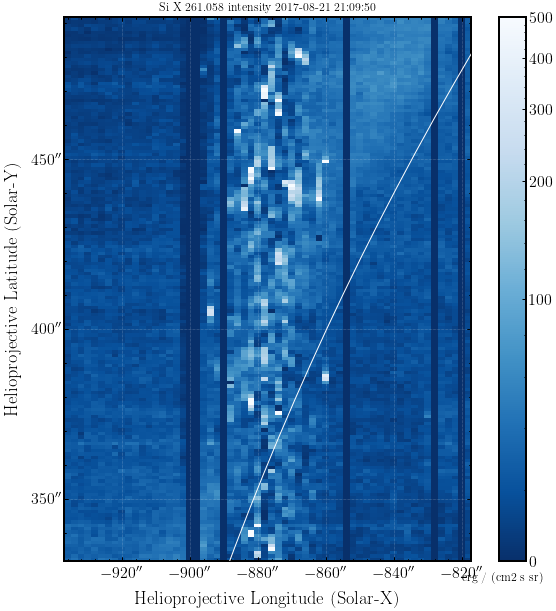

In [15]:
si_10_261_fit_res = eispac.read_fit(si_10_261_fit_file)
si_10_261_inten_map = si_10_261_fit_res.get_map(component=0, measurement='intensity')
si_10_261_inten_map.peek(draw_limb=True,vmax=5e2)

Reading fit result from, 
   ../../sav/EIS/EQSPY/eispac_fit/eis_20170821_205401.fe_14_264_787.1c-0.fit.h5
INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


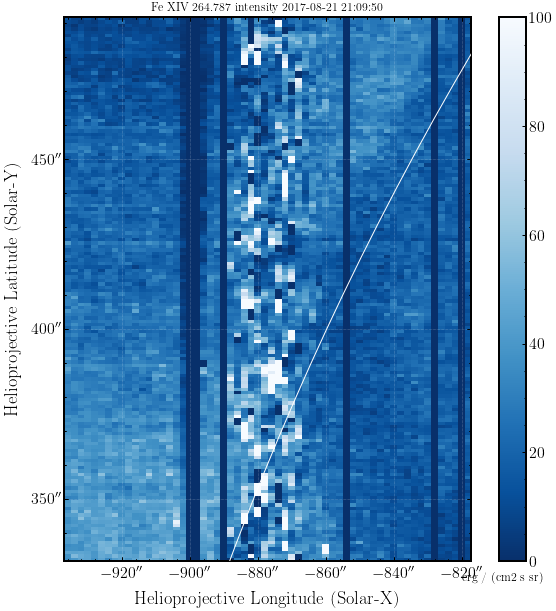

In [16]:
fe_14_264_fit_res = eispac.read_fit(fe_14_264_fit_file)
fe_14_264_inten_map = fe_14_264_fit_res.get_map(component=0, measurement='intensity')
fe_14_264_inten_map.plot_settings['norm'] = ImageNormalize(vmin=0, vmax=100)
fe_14_264_inten_map.peek(draw_limb=True)

INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


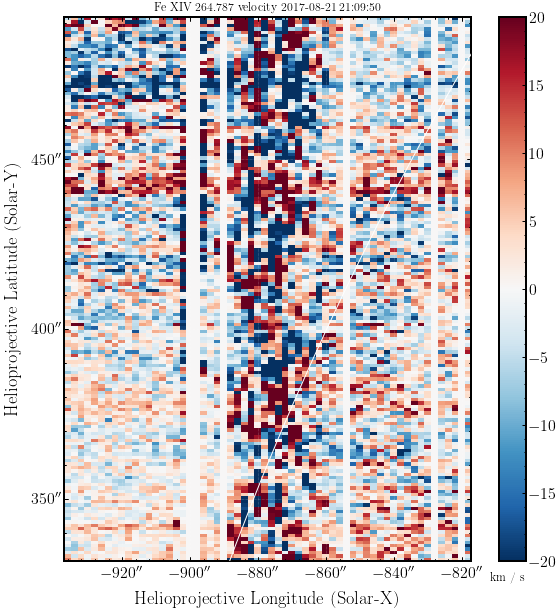

In [17]:
fe_14_264_vel_map = fe_14_264_fit_res.get_map(0, 'vel')
fe_14_264_vel_map.plot_settings['norm'] = ImageNormalize(vmin=-20, vmax=20)
fe_14_264_vel_map.peek(draw_limb=True)

INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


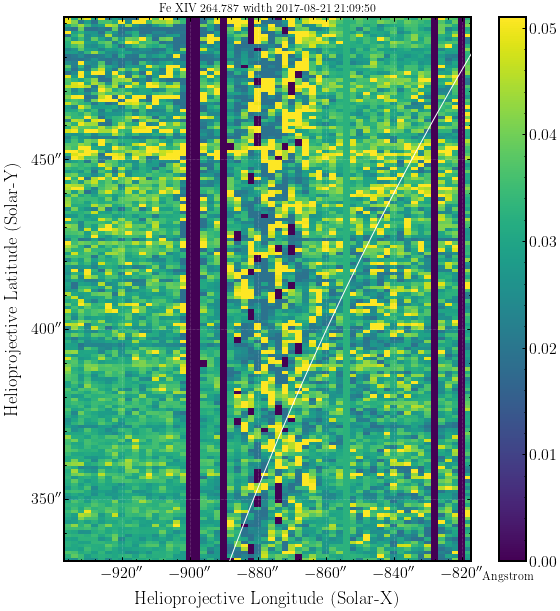

In [18]:
fe_14_264_width_map = fe_14_264_fit_res.get_map(0, 'width')
fe_14_264_width_map.peek(draw_limb=True)

In [19]:
data_cube_0 = eispac.read_cube(data_filepath,0)
data_cube_1 = eispac.read_cube(data_filepath,1)
data_cube_2 = eispac.read_cube(data_filepath,2)
data_cube_3 = eispac.read_cube(data_filepath,3)

Data file,
   /Users/yjzhu/Desktop/Solar/Eclipse2017/src/EIS/level1/EastOffLimbFullSpectra/eis_20170821_205401.data.h5
Header file,
   /Users/yjzhu/Desktop/Solar/Eclipse2017/src/EIS/level1/EastOffLimbFullSpectra/eis_20170821_205401.head.h5
Found window 0
INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
Data file,
   /Users/yjzhu/Desktop/Solar/Eclipse2017/src/EIS/level1/EastOffLimbFullSpectra/eis_20170821_205401.data.h5
Header file,
   /Users/yjzhu/Desktop/Solar/Eclipse2017/src/EIS/level1/EastOffLimbFullSpectra/eis_20170821_205401.head.h5
Found window 1
INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
Data file,
   /Users/yjzhu/Desktop/Solar/Eclipse2017/src/EIS/level1/EastOffLimbFullSpectra/eis_20170821_205401.data.h5
Header file,
   /Users/yjzhu/Desktop/Solar/Eclipse2017/src/EIS/level1/EastOffLimbFullSpectra/eis_20170821_205401.head.h5
Found window 2
INFO: uncertainty should have attribute uncertainty_type. [astropy.ndda

(array([], dtype=float64), array([], dtype=float64))


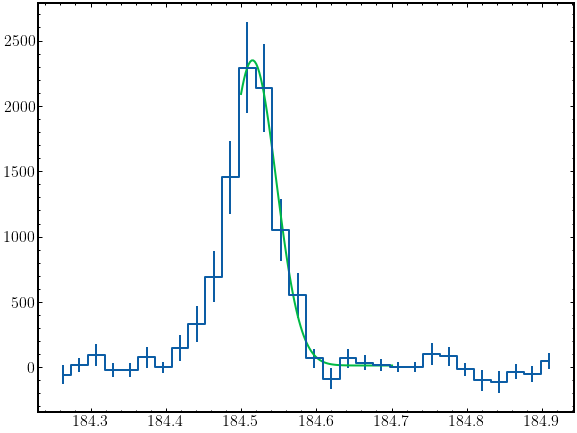

In [20]:
fig, ax = plt.subplots(figsize=(8,6),constrained_layout=True)

ax.errorbar(data_cube_0.wavelength[0,0,800:830],data_cube_0.data[0,0,800:830],data_cube_0.uncertainty.array[0,0,800:830],
            ds="steps-mid",lw=2)

fit_x, fit_y = fe_10_184_fit_res.get_fit_profile(coords=[0,0],num_wavelengths=100)
ax.plot(fit_x,fit_y,lw=2)
print(fe_10_184_fit_res.get_params(param_name="intensity",coords=[0,0]))

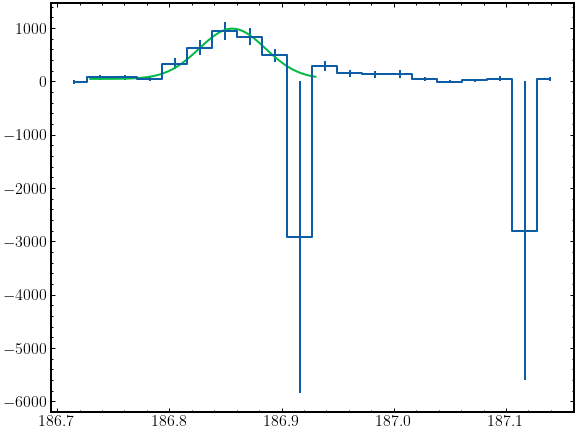

In [21]:
fig, ax = plt.subplots(figsize=(8,6),constrained_layout=True)

ax.errorbar(data_cube_0.wavelength[0,0,910:930],data_cube_0.data[0,0,910:930],
            data_cube_0.uncertainty.array[0,0,910:930],
            ds="steps-mid",lw=2)

fit_x, fit_y = fe_12_186_fit_res.get_fit_profile(coords=[0,0],num_wavelengths=100)
ax.plot(fit_x,fit_y,lw=2)

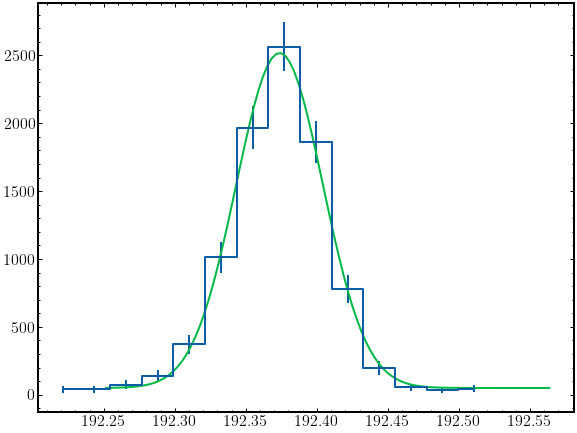

In [22]:
fig, ax = plt.subplots(figsize=(8,6),constrained_layout=True)

ax.errorbar(data_cube_1.wavelength[1,1,133:147],data_cube_1.data[1,1,133:147],
            data_cube_1.uncertainty.array[1,1,133:147],
            ds="steps-mid",lw=2)

fit_x, fit_y = fe_12_192_fit_res.get_fit_profile(coords=[1,1],num_wavelengths=100)
ax.plot(fit_x,fit_y,lw=2)

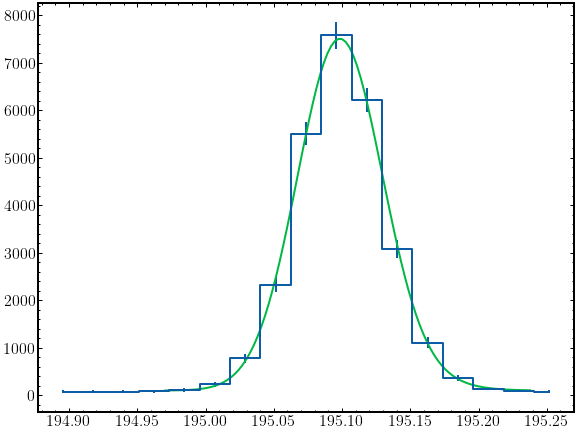

In [23]:
fig, ax = plt.subplots(figsize=(8,6),constrained_layout=True)

ax.errorbar(data_cube_1.wavelength[1,1,253:270],data_cube_1.data[1,1,253:270],
            data_cube_1.uncertainty.array[1,1,253:270],
            ds="steps-mid",lw=2)

fit_x, fit_y = fe_12_195_fit_res.get_fit_profile(coords=[1,1],num_wavelengths=100)
ax.plot(fit_x,fit_y,lw=2)

(array([], dtype=float64), array([], dtype=float64))


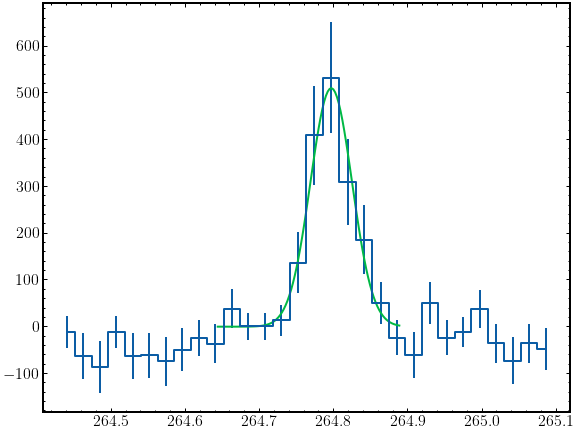

In [24]:
fig, ax = plt.subplots(figsize=(8,6),constrained_layout=True)

ax.errorbar(data_cube_2.wavelength[0,0,2880-2048:2910-2048],data_cube_2.data[0,0,2880-2048:2910-2048],
            data_cube_2.uncertainty.array[0,0,2880-2048:2910-2048],
            ds="steps-mid",lw=2)

fit_x, fit_y = fe_14_264_fit_res.get_fit_profile(coords=[0,0],num_wavelengths=100)
ax.plot(fit_x,fit_y,lw=2)
print(fe_14_264_fit_res.get_params(param_name="intensity",coords=[0,0]))

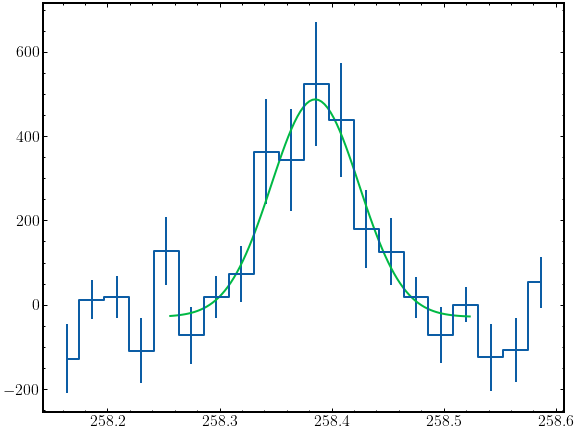

In [25]:
fig, ax = plt.subplots(figsize=(8,6),constrained_layout=True)

ax.errorbar(data_cube_2.wavelength[1,1,550:570],data_cube_2.data[1,1,550:570],
            data_cube_2.uncertainty.array[1,1,550:570],
            ds="steps-mid",lw=2)

fit_x, fit_y = si_10_258_fit_res.get_fit_profile(coords=[1,1],num_wavelengths=100)
ax.plot(fit_x,fit_y,lw=2)

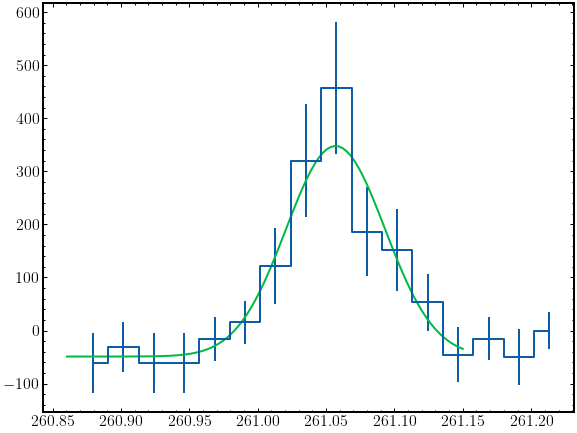

In [26]:
fig, ax = plt.subplots(figsize=(8,6),constrained_layout=True)

ax.errorbar(data_cube_2.wavelength[1,1,672:688],data_cube_2.data[1,1,672:688],
            data_cube_2.uncertainty.array[1,1,672:688],
            ds="steps-mid",lw=2)

fit_x, fit_y = si_10_261_fit_res.get_fit_profile(coords=[1,1],num_wavelengths=100)
ax.plot(fit_x,fit_y,lw=2)

In [27]:
fe_10_184_fit_res.parinfo

[{'fixed': 0,
  'limited': array([1, 0], dtype=int16),
  'limits': array([0., 0.]),
  'tied': '',
  'value': 16837.251207021607},
 {'fixed': 0,
  'limited': array([1, 1], dtype=int16),
  'limits': array([184.49835916, 184.57863917]),
  'tied': '',
  'value': 184.5384991666322},
 {'fixed': 0,
  'limited': array([1, 1], dtype=int16),
  'limits': array([0.01910828, 0.05095541]),
  'tied': '',
  'value': 0.02647366460097861},
 {'fixed': 0,
  'limited': array([0, 0], dtype=int16),
  'limits': array([0., 0.]),
  'tied': '',
  'value': 777.5882416832471}]

In [28]:
data_cube_0.meta["ccd_offset"][815]

17.042467

In [29]:
data_cube_2.meta["ccd_offset"][500]

-0.056740746

In [30]:
fe_10_184_vel, fe_10_184_vel_err = fe_10_184_fit_res.calculate_velocity()
print(fe_10_184_vel[0,0])

5.052162852298814


/anaconda3/lib/python3.7/site-packages/eispac/core/eisfitresult.py:426: RuntimeWarning: invalid value encountered in true_divide
  rel_error = obs_errs/obs_cent


In [31]:
fe_10_184_vel.shape

(160, 60)

In [32]:
data_cube_0.wavelength.shape

(160, 60, 1024)

In [33]:
data_cube_0.meta.keys()

dict_keys(['filename_data', 'filename_head', 'wininfo', 'iwin', 'iwin_str', 'index', 'pointing', 'wave', 'radcal', 'slit_width', 'slit_width_units', 'ccd_offset', 'wave_corr', 'wave_corr_t', 'wave_corr_tilt', 'date_obs', 'date_obs_format', 'duration', 'duration_units', 'mod_index', 'aspect', 'aspect_ratio', 'extent_arcsec', 'notes'])

In [34]:
data_cube_0.meta["extent_arcsec"]

[-936.2666082382202, -816.4586114883423, 314.5737609863281, 474.5737609863281]

In [35]:
data_cube_2.meta["extent_arcsec"]

[-936.2666082382202, -816.4586114883423, 332.2292785644531, 492.2292785644531]

In [36]:
data_cube_0.wcs

WCS Keywords

Number of WCS axes: 3
CTYPE : 'WAVE'  'HPLN-TAN'  'HPLT-TAN'  
CRVAL : 1.6640280537002152e-08  -0.26007405784395005  0.08738160027398004  
CRPIX : 1.0  1.0  1.0  
PC1_1 PC1_2 PC1_3  : 1.0  0.0  0.0  
PC2_1 PC2_2 PC2_3  : 0.0  1.0  0.0  
PC3_1 PC3_2 PC3_3  : 0.0  0.0  1.0  
CDELT : 2.230382577710088e-12  0.0005546666516198053  0.0002777777777777778  
NAXIS : 1024  60  160

In [37]:
data_cube_2.wcs

WCS Keywords

Number of WCS axes: 3
CTYPE : 'WAVE'  'HPLN-TAN'  'HPLT-TAN'  
CRVAL : 2.459003537733224e-08  -0.26007405784395005  0.0922859107123481  
CRPIX : 1.0  1.0  1.0  
PC1_1 PC1_2 PC1_3  : 1.0  0.0  0.0  
PC2_1 PC2_2 PC2_3  : 0.0  1.0  0.0  
PC3_1 PC3_2 PC3_3  : 0.0  0.0  1.0  
CDELT : 2.226394951787825e-12  0.0005546666516198053  0.0002777777777777778  
NAXIS : 1024  60  160

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log10
  
/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:621: RuntimeWarning: overflow encountered in multiply
  xa *= self.N


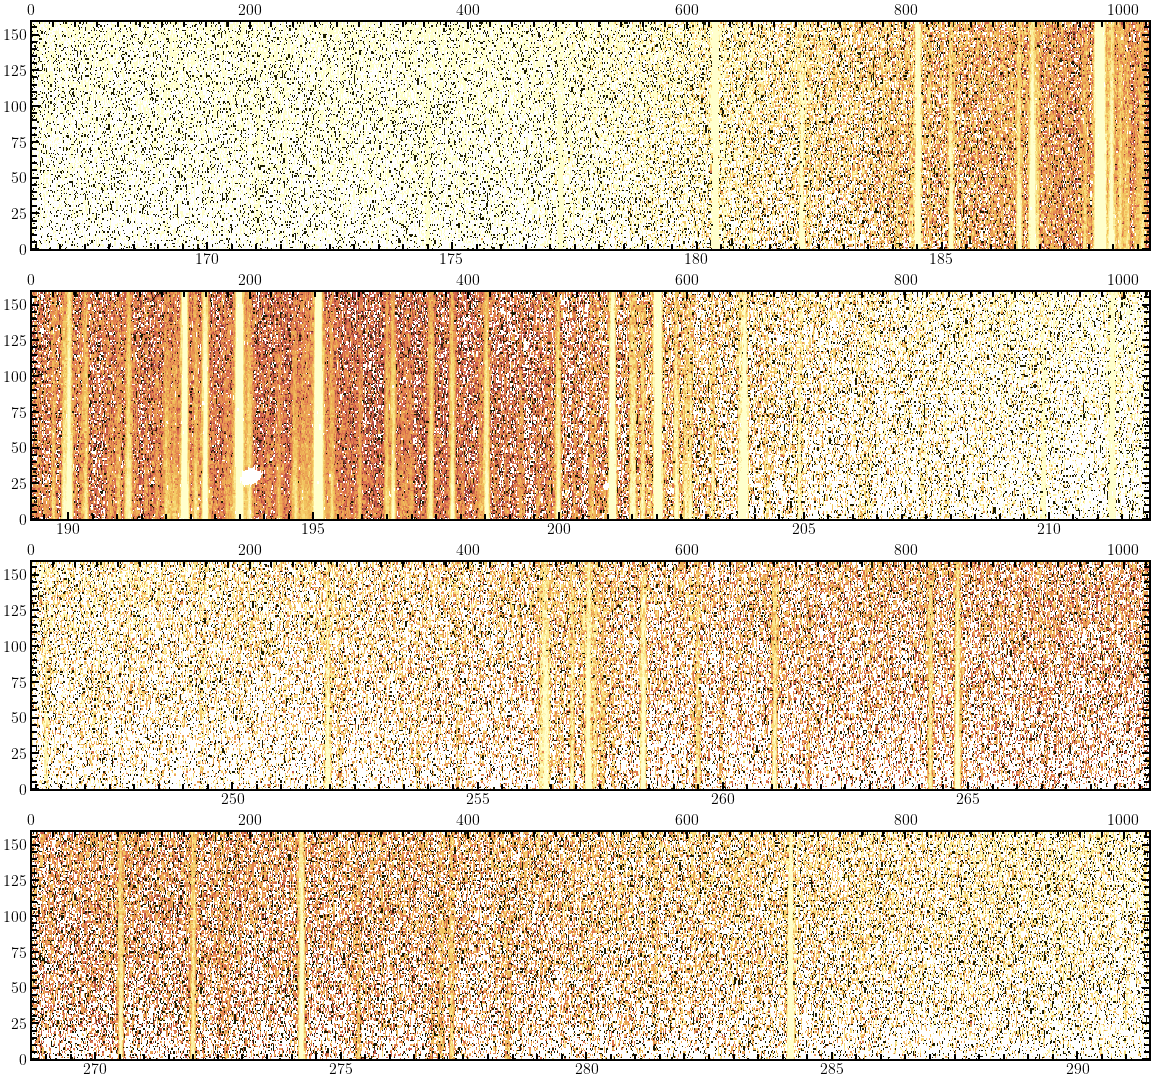

In [38]:
fig, axes = plt.subplots(4,1,figsize=(16,15),constrained_layout=True)

data_cubes = (data_cube_0, data_cube_1, data_cube_2, data_cube_3)
for ii, data_cube_ in enumerate(data_cubes):
    axes[ii].pcolormesh((data_cube_.wavelength)[:,0,:],np.tile(np.arange(160),(1024,1)).T,
                    np.nan_to_num(np.log10(data_cube_.data[:,0,:]),nan=-np.inf),
                    cmap=cmcm.lajolla_r,shading="auto",vmin=0,vmax=2.5)

    ax_pixel = axes[ii].twiny()
    ax_pixel.set_xlim(-0.5,1023.5)
    axes[ii].xaxis.set_minor_locator(ticker.AutoMinorLocator(10))
    ax_pixel.xaxis.set_minor_locator(ticker.AutoMinorLocator(10))

    for ax_ in (axes[ii], ax_pixel):
        ax_.tick_params(labelsize=16)
        ax_.tick_params(which="major",width=2,length=8)
        ax_.tick_params(which="minor",width=2,length=6)

(257.0, 258.0)

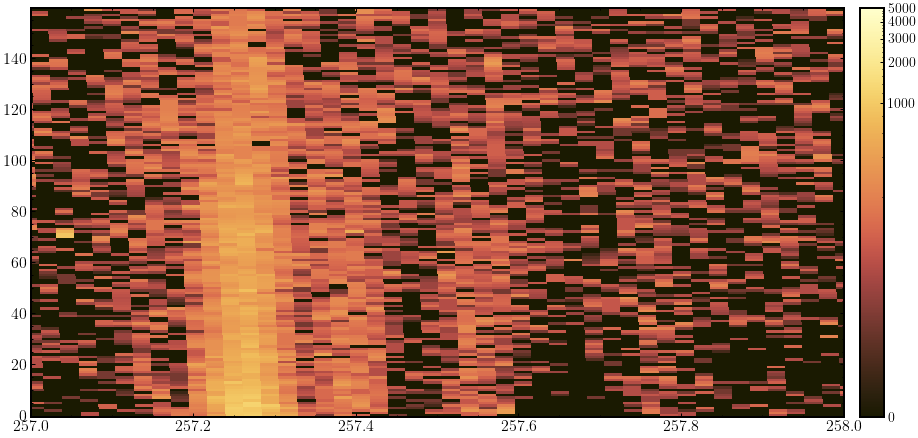

In [39]:
fig, ax = plt.subplots(figsize=(12,6),constrained_layout=True)
im = ax.pcolormesh((data_cube_2.wavelength)[:,0,:],np.tile(np.arange(160),(1024,1)).T,data_cube_2.data[:,0,:],shading="auto",cmap=cmcm.lajolla_r,
                    rasterized=True,norm=ImageNormalize(data_cube_2.data[:,0,:],vmin=0,vmax=5e3,stretch=LogStretch()))
plot_colorbar(im,ax)
ax.set_xlim(257,258)
# ax.axvline(184.537)

In [40]:
def interp_window_slit_tilt(data,wvl):
    data_shape = data.shape
    data_interp = np.zeros(data_shape)
    for ii in range(data_shape[0]):
        f = interp1d(wvl[ii,:],data[ii,:],kind="cubic",fill_value="extrapolate")
        data_interp[ii,:] = f(wvl[0,:])
    
    return data_interp

In [41]:
data_0_interp = np.zeros_like(data_cube_0.data)
for ii in range(60):
    data_0_interp[:,ii,:] = interp_window_slit_tilt(data_cube_0.data[:,ii,:],data_cube_0.wavelength[:,ii,:])

In [42]:
data_1_interp = np.zeros_like(data_cube_1.data)
for ii in range(60):
    data_1_interp[:,ii,:] = interp_window_slit_tilt(data_cube_1.data[:,ii,:],data_cube_1.wavelength[:,ii,:])

In [43]:
data_2_interp = np.zeros_like(data_cube_2.data)
for ii in range(60):
    data_2_interp[:,ii,:] = interp_window_slit_tilt(data_cube_2.data[:,ii,:],data_cube_2.wavelength[:,ii,:])

In [44]:
FeX_184_bin_fit = np.zeros((10,16,4))
FeX_184_slice = slice(800,830)
FeX_184_fitmodels = []
for ii in range(16):
    data_masked = np.copy(data_0_interp)
    data_masked[np.where(data_masked < -200)] = np.nan
    FeX_184_bin_ = data_masked[:,ii,FeX_184_slice]
    FeX_184_bin_ = np.nanmean(FeX_184_bin_.reshape(-1,16,30),axis=1)
    

    FeX_184_bin_fit_model = SpectrumFitRow(data=FeX_184_bin_, wvl=data_cube_0.wavelength[0,ii*3,FeX_184_slice],
                                            line_number=1,line_wvl_init=[184.5],int_max_init=[1e3],fwhm_init=[0.07],)
    # FeX_184_bin_fit_model.plot_fit(plot_fit=False)
    FeX_184_bin_fit_model.run_lse(absolute_sigma=False)
    FeX_184_fitmodels.append(FeX_184_bin_fit_model)
    FeX_184_bin_fit[:,ii,0] = FeX_184_bin_fit_model.line_wvl_fit[:,0]
    FeX_184_bin_fit[:,ii,1] = FeX_184_bin_fit_model.int_total_fit[:,0]
    FeX_184_bin_fit[:,ii,2] = FeX_184_bin_fit_model.fwhm_fit[:,0]
    FeX_184_bin_fit[:,ii,3] = FeX_184_bin_fit_model.int_cont_fit[:]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in sqrt


Text(0, 0.5, 'Solar-Y [arcsec]')

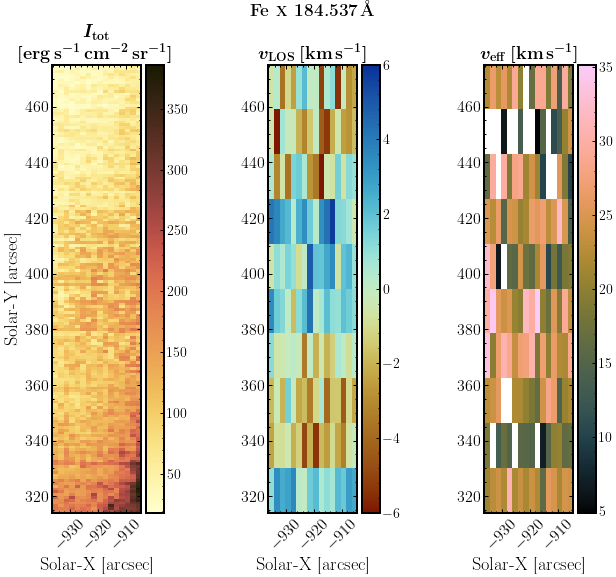

In [45]:
fig, axes = plt.subplots(1,3,figsize=(9,8),constrained_layout=True)

xstart, xend, ystart, yend = fe_10_184_fit_res.meta["extent_arcsec"]
xaxis_arcsec, yaxis_arcsec = np.linspace(xstart+1,xstart+31,16), np.linspace(ystart, yend, 160)
yaxis_arcsec_bin = np.mean(yaxis_arcsec.reshape(-1,16),axis=1)

im_int = axes[0].pcolormesh(xaxis_arcsec,yaxis_arcsec,fe_10_184_fit_res.fit["int"][:,:16,0],
                    shading="auto",rasterized=True,cmap=cmcm.lajolla)
plot_colorbar(im_int,axes[0], width="20%",bbox_to_anchor=(1.05, 0., 1, 1))
axes[0].set_title(r"$\boldsymbol{I_{\rm tot}}$" + "\n" + \
    r"$\boldsymbol{\mathrm{[erg\,s^{-1}\,cm^{-2}\,sr^{-1}]}}$",fontsize=18)

FeX_184_rest_wvl = 184.537

FeX_184_bin_vel = (FeX_184_bin_fit[:,:,0] - FeX_184_rest_wvl)/FeX_184_rest_wvl*const.c.cgs/1e5
FeX_184_bin_vel_cor = FeX_184_bin_vel - np.median(FeX_184_bin_vel,axis=0)
im_vel = axes[1].pcolormesh(xaxis_arcsec,yaxis_arcsec_bin,FeX_184_bin_vel_cor,
                    shading="auto",rasterized=True,cmap=cmcm.roma,vmin=-6,vmax=6)
plot_colorbar(im_vel,axes[1], width="20%",bbox_to_anchor=(1.05, 0., 1, 1))
axes[1].set_title(r"$\boldsymbol{v_{\rm LOS}}\,$" + \
    r"$\boldsymbol{\mathrm{[km\,s^{-1}]}}$",fontsize=18)

# slit_width = 0.062
slit_width = np.mean(fe_10_184_fit_res.meta["slit_width"].reshape(-1,16),axis=1)
im_fwhm = axes[2].pcolormesh(xaxis_arcsec,yaxis_arcsec_bin,
                np.sqrt(FeX_184_bin_fit[:,:,2]**2 - slit_width[:,np.newaxis]**2)/FeX_184_rest_wvl \
                    *const.c.cgs.value/1e5/np.sqrt(4*np.log(2)),cmap=cmcm.batlowK)
plot_colorbar(im_fwhm,axes[2], width="20%",bbox_to_anchor=(1.05, 0., 1, 1))
axes[2].set_title(r"$\boldsymbol{v_{\rm eff}}\,$" + \
     r"$\boldsymbol{\mathrm{[km\,s^{-1}]}}$",fontsize=18)
fig.suptitle(r"\textbf{Fe \textsc{x} 184.537\,\mbox{\AA}",fontsize=18)
for ax_ in axes:
    ax_.set_aspect(1)
    ax_.set_xlabel("Solar-X [arcsec]",fontsize=18)
    ax_.tick_params(axis="x",rotation=45)

axes[0].set_ylabel("Solar-Y [arcsec]",fontsize=18)


In [46]:
print(35/1e3/184.537, 0.1/637.4)

0.00018966386144783973 0.00015688735487919675


In [47]:
FeXIV_264_bin_fit = np.zeros((10,16,4))
FeXIV_264_slice = slice(835,865)
FeXIV_264_fitmodels = []
for ii in range(16):
    data_masked = np.copy(data_2_interp)
    data_masked[np.where(data_masked < -200)] = np.nan
    FeXIV_264_bin_ = data_masked[:,ii,FeXIV_264_slice]
    FeXIV_264_bin_ = np.nanmean(FeXIV_264_bin_.reshape(-1,16,30),axis=1)

    FeXIV_264_bin_fit_model = SpectrumFitRow(data=FeXIV_264_bin_, wvl=data_cube_2.wavelength[0,ii*3,FeXIV_264_slice],line_number=1,
                                            line_wvl_init=[264.8],int_max_init=[1e2],fwhm_init=[0.07])
    # FeXIV_264_bin_fit_model.plot_fit(plot_fit=False)
    FeXIV_264_bin_fit_model.run_lse()
    FeXIV_264_fitmodels.append(FeXIV_264_bin_fit_model)
    FeXIV_264_bin_fit[:,ii,0] = FeXIV_264_bin_fit_model.line_wvl_fit[:,0]
    FeXIV_264_bin_fit[:,ii,1] = FeXIV_264_bin_fit_model.int_total_fit[:,0]
    FeXIV_264_bin_fit[:,ii,2] = FeXIV_264_bin_fit_model.fwhm_fit[:,0]
    FeXIV_264_bin_fit[:,ii,3] = FeXIV_264_bin_fit_model.int_cont_fit[:]

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:205: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")


Text(0, 0.5, 'Solar-Y [arcsec]')

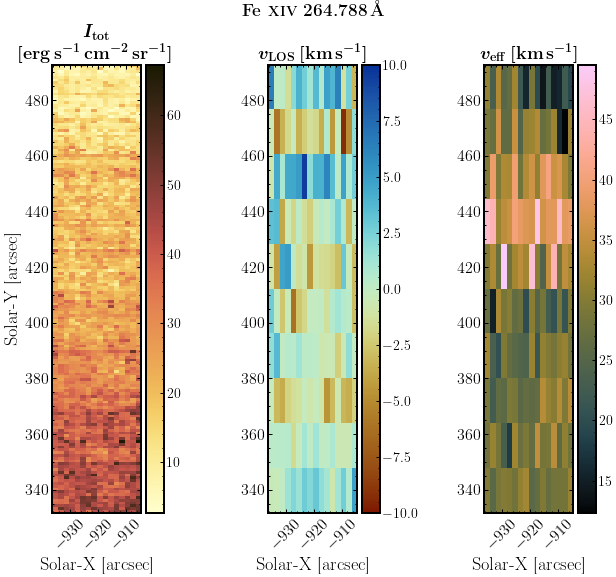

In [48]:
fig, axes = plt.subplots(1,3,figsize=(9,8),constrained_layout=True)

xstart, xend, ystart, yend = fe_14_264_fit_res.meta["extent_arcsec"]
xaxis_arcsec, yaxis_arcsec = np.linspace(xstart+1,xstart+31,16), np.linspace(ystart, yend, 160)
yaxis_arcsec_bin = np.mean(yaxis_arcsec.reshape(-1,16),axis=1)

FeXIV_264_rest_wvl = 264.788
im_int = axes[0].pcolormesh(xaxis_arcsec,yaxis_arcsec,fe_14_264_fit_res.fit["int"][:,:16,0],
                    shading="auto",rasterized=True,cmap=cmcm.lajolla)
plot_colorbar(im_int,axes[0], width="20%",bbox_to_anchor=(1.05, 0., 1, 1))
axes[0].set_title(r"$\boldsymbol{I_{\rm tot}}$" + "\n" + \
    r"$\boldsymbol{\mathrm{[erg\,s^{-1}\,cm^{-2}\,sr^{-1}]}}$",fontsize=18)

FeXIV_264_bin_vel = (FeXIV_264_bin_fit[:,:,0] - FeXIV_264_rest_wvl)/FeXIV_264_rest_wvl*const.c.cgs.value/1e5
FeXIV_264_bin_vel_cor = FeXIV_264_bin_vel - np.median(FeXIV_264_bin_vel,axis=0)
im_vel = axes[1].pcolormesh(xaxis_arcsec,yaxis_arcsec_bin,FeXIV_264_bin_vel_cor,
                    shading="auto",rasterized=True,cmap=cmcm.roma,vmin=-10,vmax=10)
plot_colorbar(im_vel,axes[1], width="20%",bbox_to_anchor=(1.05, 0., 1, 1))
axes[1].set_title(r"$\boldsymbol{v_{\rm LOS}}\,$" + \
    r"$\boldsymbol{\mathrm{[km\,s^{-1}]}}$",fontsize=18)

# slit_width = 0.062
slit_width = np.mean(fe_14_264_fit_res.meta["slit_width"].reshape(-1,16),axis=1)
im_fwhm = axes[2].pcolormesh(xaxis_arcsec,yaxis_arcsec_bin,
        np.sqrt(FeXIV_264_bin_fit[:,:,2]**2 - slit_width[:,np.newaxis]**2)/FeXIV_264_rest_wvl \
                    *const.c.cgs.value/1e5/np.sqrt(4*np.log(2)),cmap=cmcm.batlowK)
plot_colorbar(im_fwhm,axes[2], width="20%",bbox_to_anchor=(1.05, 0., 1, 1))
axes[2].set_title(r"$\boldsymbol{v_{\rm eff}}\,$" + \
    r"$\boldsymbol{\mathrm{[km\,s^{-1}]}}$",fontsize=18)
fig.suptitle(r"\textbf{Fe \textsc{xiv} 264.788\,\mbox{\AA}",fontsize=18)
for ax_ in axes:
    ax_.set_aspect(1)
    ax_.set_xlabel("Solar-X [arcsec]",fontsize=18)
    ax_.tick_params(axis="x",rotation=45)

axes[0].set_ylabel("Solar-Y [arcsec]",fontsize=18)


In [49]:
print(50/1e3/264.,0.085/530.3)

0.0001893939393939394 0.0001602866302093155


In [50]:
FeXII_186_bin_fit = np.zeros((10,16,4))
FeXII_186_slice = slice(910,930)
FeXII_186_fitmodels = []
for ii in range(16):
    data_masked = np.copy(data_0_interp)
    data_masked[np.where(data_masked < -200)] = np.nan
    FeXII_186_bin_ = data_masked[:,ii,FeXII_186_slice]
    FeXII_186_bin_ = np.nanmean(FeXII_186_bin_.reshape(-1,16,20),axis=1)

    FeXII_186_bin_fit_model = SpectrumFitRow(data=FeXII_186_bin_, wvl=data_cube_0.wavelength[0,ii*3,FeXII_186_slice],line_number=1,
                                            line_wvl_init=[186.85],int_max_init=[1e2],fwhm_init=[0.07])
    # FeXII_186_bin_fit_model.plot_fit(plot_fit=False)
    FeXII_186_bin_fit_model.run_lse()
    FeXII_186_fitmodels.append(FeXII_186_bin_fit_model)
    FeXII_186_bin_fit[:,ii,0] = FeXII_186_bin_fit_model.line_wvl_fit[:,0]
    FeXII_186_bin_fit[:,ii,1] = FeXII_186_bin_fit_model.int_total_fit[:,0]
    FeXII_186_bin_fit[:,ii,2] = FeXII_186_bin_fit_model.fwhm_fit[:,0]
    FeXII_186_bin_fit[:,ii,3] = FeXII_186_bin_fit_model.int_cont_fit[:]

Text(0, 0.5, 'Solar-Y [arcsec]')

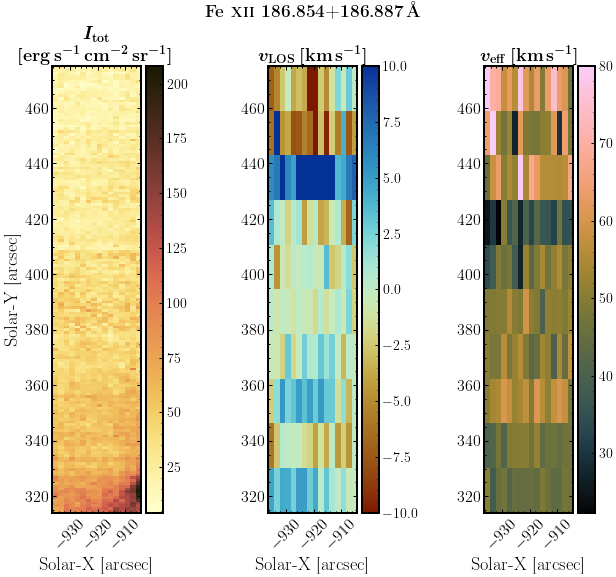

In [51]:
fig, axes = plt.subplots(1,3,figsize=(9,8),constrained_layout=True)

xstart, xend, ystart, yend = fe_12_186_fit_res.meta["extent_arcsec"]
xaxis_arcsec, yaxis_arcsec = np.linspace(xstart+1,xstart+31,16), np.linspace(ystart, yend, 160)
yaxis_arcsec_bin = np.mean(yaxis_arcsec.reshape(-1,16),axis=1)

FeXII_186_rest_wvl = (186.854+186.887)/2.
im_int = axes[0].pcolormesh(xaxis_arcsec,yaxis_arcsec,fe_12_186_fit_res.fit["int"][:,:16,0],
                    shading="auto",rasterized=True,cmap=cmcm.lajolla)
plot_colorbar(im_int,axes[0], width="20%",bbox_to_anchor=(1.05, 0., 1, 1))
axes[0].set_title(r"$\boldsymbol{I_{\rm tot}}$" + "\n" + \
    r"$\boldsymbol{\mathrm{[erg\,s^{-1}\,cm^{-2}\,sr^{-1}]}}$",fontsize=18)

FeXII_186_bin_vel = (FeXII_186_bin_fit[:,:,0] - FeXII_186_rest_wvl)/FeXII_186_rest_wvl*const.c.cgs.value/1e5
FeXII_186_bin_vel_cor = FeXII_186_bin_vel - np.median(FeXII_186_bin_vel,axis=0)
im_vel = axes[1].pcolormesh(xaxis_arcsec,yaxis_arcsec_bin,FeXII_186_bin_vel_cor,
                    shading="auto",rasterized=True,cmap=cmcm.roma,vmin=-10,vmax=10)
plot_colorbar(im_vel,axes[1], width="20%",bbox_to_anchor=(1.05, 0., 1, 1))
axes[1].set_title(r"$\boldsymbol{v_{\rm LOS}}\,$" + \
    r"$\boldsymbol{\mathrm{[km\,s^{-1}]}}$",fontsize=18)

# slit_width = 0.062
slit_width = np.mean(fe_12_186_fit_res.meta["slit_width"].reshape(-1,16),axis=1)
im_fwhm = axes[2].pcolormesh(xaxis_arcsec,yaxis_arcsec_bin,
        np.sqrt(FeXII_186_bin_fit[:,:,2]**2 - slit_width[:,np.newaxis]**2)/FeXII_186_rest_wvl \
                    *const.c.cgs.value/1e5/np.sqrt(4*np.log(2)),cmap=cmcm.batlowK,vmax=80)
plot_colorbar(im_fwhm,axes[2], width="20%",bbox_to_anchor=(1.05, 0., 1, 1))
axes[2].set_title(r"$\boldsymbol{v_{\rm eff}}\,$" + \
    r"$\boldsymbol{\mathrm{[km\,s^{-1}]}}$",fontsize=18)
fig.suptitle(r"\textbf{Fe \textsc{xii} 186.854+186.887\,\mbox{\AA}",fontsize=18)
for ax_ in axes:
    ax_.set_aspect(1)
    ax_.set_xlabel("Solar-X [arcsec]",fontsize=18)
    ax_.tick_params(axis="x",rotation=45)

axes[0].set_ylabel("Solar-Y [arcsec]",fontsize=18)


In [52]:
FeXII_192_bin_fit = np.zeros((10,16,4))
FeXII_192_slice = slice(133,147)
FeXII_192_fitmodels = []
for ii in range(16):
    data_masked = np.copy(data_1_interp)
    data_masked[np.where(data_masked < -200)] = np.nan
    FeXII_192_bin_ = data_masked[:,ii,FeXII_192_slice]
    FeXII_192_bin_ = np.nanmean(FeXII_192_bin_.reshape(-1,16,14),axis=1)

    FeXII_192_bin_fit_model = SpectrumFitRow(data=FeXII_192_bin_, wvl=data_cube_1.wavelength[0,ii*3,FeXII_192_slice],line_number=1,
                                            line_wvl_init=[192.37],int_max_init=[1e3],fwhm_init=[0.07])
    # FeXII_192_bin_fit_model.plot_fit(plot_fit=False)
    FeXII_192_bin_fit_model.run_lse()
    FeXII_192_fitmodels.append(FeXII_192_bin_fit_model)
    FeXII_192_bin_fit[:,ii,0] = FeXII_192_bin_fit_model.line_wvl_fit[:,0]
    FeXII_192_bin_fit[:,ii,1] = FeXII_192_bin_fit_model.int_total_fit[:,0]
    FeXII_192_bin_fit[:,ii,2] = FeXII_192_bin_fit_model.fwhm_fit[:,0]
    FeXII_192_bin_fit[:,ii,3] = FeXII_192_bin_fit_model.int_cont_fit[:]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in sqrt


Text(0, 0.5, 'Solar-Y [arcsec]')

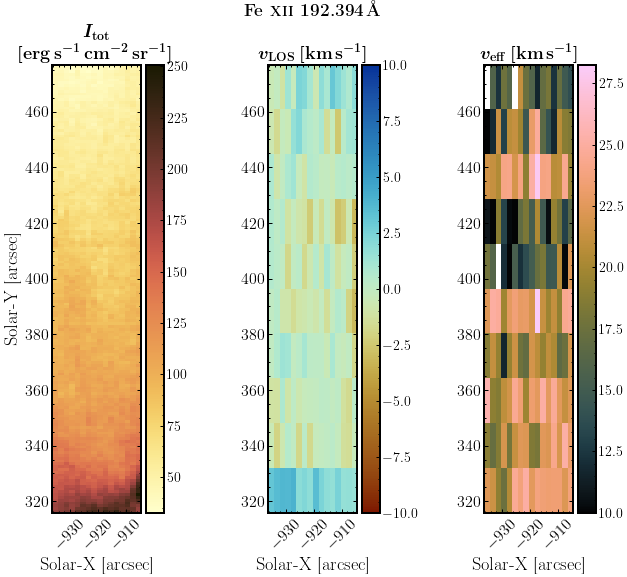

In [53]:
fig, axes = plt.subplots(1,3,figsize=(9,8),constrained_layout=True)

xstart, xend, ystart, yend = fe_12_192_fit_res.meta["extent_arcsec"]
xaxis_arcsec, yaxis_arcsec = np.linspace(xstart+1,xstart+31,16), np.linspace(ystart, yend, 160)
yaxis_arcsec_bin = np.mean(yaxis_arcsec.reshape(-1,16),axis=1)

FeXII_192_rest_wvl = 192.394
im_int = axes[0].pcolormesh(xaxis_arcsec,yaxis_arcsec,fe_12_192_fit_res.fit["int"][:,:16,0],
                    shading="auto",rasterized=True,cmap=cmcm.lajolla)
plot_colorbar(im_int,axes[0], width="20%",bbox_to_anchor=(1.05, 0., 1, 1))
axes[0].set_title(r"$\boldsymbol{I_{\rm tot}}$" + "\n" + \
    r"$\boldsymbol{\mathrm{[erg\,s^{-1}\,cm^{-2}\,sr^{-1}]}}$",fontsize=18)

FeXII_192_bin_vel = (FeXII_192_bin_fit[:,:,0] - FeXII_192_rest_wvl)/FeXII_192_rest_wvl*const.c.cgs.value/1e5
FeXII_192_bin_vel_cor = FeXII_192_bin_vel - np.median(FeXII_192_bin_vel,axis=0)
im_vel = axes[1].pcolormesh(xaxis_arcsec,yaxis_arcsec_bin,FeXII_192_bin_vel_cor,
                    shading="auto",rasterized=True,cmap=cmcm.roma,vmin=-10,vmax=10)
plot_colorbar(im_vel,axes[1], width="20%",bbox_to_anchor=(1.05, 0., 1, 1))
axes[1].set_title(r"$\boldsymbol{v_{\rm LOS}}\,$" + \
    r"$\boldsymbol{\mathrm{[km\,s^{-1}]}}$",fontsize=18)

# slit_width = 0.062
slit_width = np.mean(fe_12_192_fit_res.meta["slit_width"].reshape(-1,16),axis=1)
im_fwhm = axes[2].pcolormesh(xaxis_arcsec,yaxis_arcsec_bin,
        np.sqrt(FeXII_192_bin_fit[:,:,2]**2 - slit_width[:,np.newaxis]**2)/FeXII_192_rest_wvl \
                    *const.c.cgs.value/1e5/np.sqrt(4*np.log(2)),cmap=cmcm.batlowK,vmin=10)
plot_colorbar(im_fwhm,axes[2], width="20%",bbox_to_anchor=(1.05, 0., 1, 1))
axes[2].set_title(r"$\boldsymbol{v_{\rm eff}}\,$" + \
    r"$\boldsymbol{\mathrm{[km\,s^{-1}]}}$",fontsize=18)
fig.suptitle(r"\textbf{Fe \textsc{xii} 192.394\,\mbox{\AA}",fontsize=18)
for ax_ in axes:
    ax_.set_aspect(1)
    ax_.set_xlabel("Solar-X [arcsec]",fontsize=18)
    ax_.tick_params(axis="x",rotation=45)

axes[0].set_ylabel("Solar-Y [arcsec]",fontsize=18)


In [54]:
FeXII_195_bin_fit = np.zeros((10,16,4))
FeXII_195_slice = slice(253,270)
FeXII_195_fitmodels = []
for ii in range(16):
    data_masked = np.copy(data_1_interp)
    data_masked[np.where(data_masked < -500)] = np.nan
    FeXII_195_bin_ = data_masked[:,ii,FeXII_195_slice]
    FeXII_195_bin_ = np.nanmean(FeXII_195_bin_.reshape(-1,16,FeXII_195_slice.stop - FeXII_195_slice.start),axis=1)

    FeXII_195_bin_fit_model = SpectrumFitRow(data=FeXII_195_bin_, wvl=data_cube_1.wavelength[0,ii*3,FeXII_195_slice],line_number=1,
                                            line_wvl_init=[195.1],int_max_init=[5e3],fwhm_init=[0.08])
    # FeXII_195_bin_fit_model.plot_fit(plot_fit=False)
    FeXII_195_bin_fit_model.run_lse()
    FeXII_195_fitmodels.append(FeXII_195_bin_fit_model)
    FeXII_195_bin_fit[:,ii,0] = FeXII_195_bin_fit_model.line_wvl_fit[:,0]
    FeXII_195_bin_fit[:,ii,1] = FeXII_195_bin_fit_model.int_total_fit[:,0]
    FeXII_195_bin_fit[:,ii,2] = FeXII_195_bin_fit_model.fwhm_fit[:,0]
    FeXII_195_bin_fit[:,ii,3] = FeXII_195_bin_fit_model.int_cont_fit[:]

<AxesSubplot:ylabel='Intensity'>

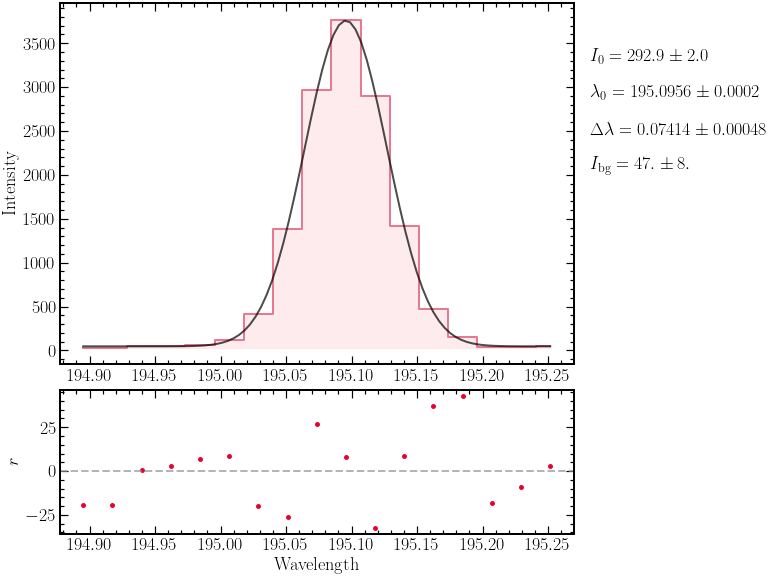

In [55]:
FeXII_195_fitmodels[1].plot_single(5)

<AxesSubplot:ylabel='Intensity'>

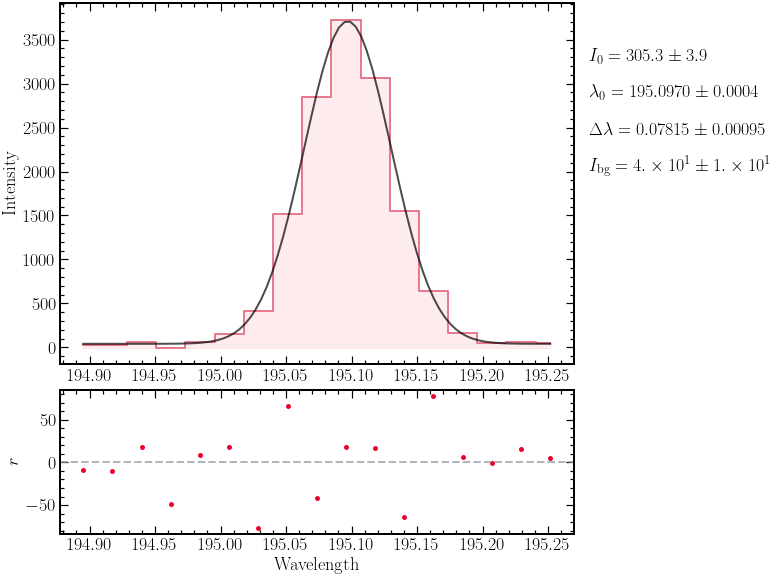

In [56]:
FeXII_195_fitmodels[1].plot_single(4)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in sqrt


Text(0, 0.5, 'Solar-Y [arcsec]')

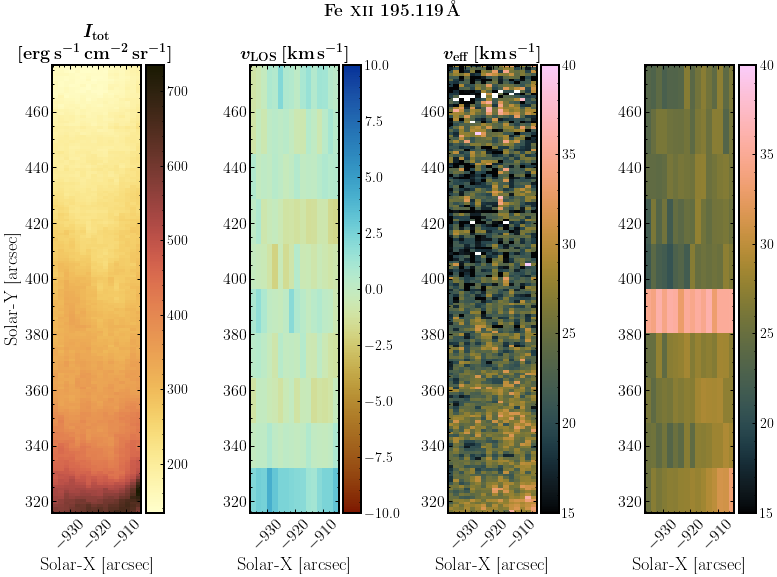

In [57]:
fig, axes = plt.subplots(1,4,figsize=(11,8),constrained_layout=True)

xstart, xend, ystart, yend = fe_12_195_fit_res.meta["extent_arcsec"]
xaxis_arcsec, yaxis_arcsec = np.linspace(xstart+1,xstart+31,16), np.linspace(ystart, yend, 160)
yaxis_arcsec_bin = np.mean(yaxis_arcsec.reshape(-1,16),axis=1)

FeXII_195_rest_wvl = 195.119
im_int = axes[0].pcolormesh(xaxis_arcsec,yaxis_arcsec,fe_12_195_fit_res.fit["int"][:,:16,0],
                    shading="auto",rasterized=True,cmap=cmcm.lajolla)
plot_colorbar(im_int,axes[0], width="20%",bbox_to_anchor=(1.05, 0., 1, 1))
axes[0].set_title(r"$\boldsymbol{I_{\rm tot}}$" + "\n" + \
    r"$\boldsymbol{\mathrm{[erg\,s^{-1}\,cm^{-2}\,sr^{-1}]}}$",fontsize=18)

FeXII_195_bin_vel = (FeXII_195_bin_fit[:,:,0] - FeXII_195_rest_wvl)/FeXII_195_rest_wvl*const.c.cgs.value/1e5
FeXII_195_bin_vel_cor = FeXII_195_bin_vel - np.median(FeXII_195_bin_vel,axis=0)
im_vel = axes[1].pcolormesh(xaxis_arcsec,yaxis_arcsec_bin,FeXII_195_bin_vel_cor,
                    shading="auto",rasterized=True,cmap=cmcm.roma,vmin=-10,vmax=10)
plot_colorbar(im_vel,axes[1], width="20%",bbox_to_anchor=(1.05, 0., 1, 1))
axes[1].set_title(r"$\boldsymbol{v_{\rm LOS}}\,$" + \
    r"$\boldsymbol{\mathrm{[km\,s^{-1}]}}$",fontsize=18)

# slit_width = 0.062
slit_width = np.mean(fe_12_195_fit_res.meta["slit_width"].reshape(-1,16),axis=1)
# im_fwhm = axes[2].pcolormesh(xaxis_arcsec,yaxis_arcsec_bin,
#         np.sqrt(FeXII_195_bin_fit[:,:,2]**2 - slit_width[:,np.newaxis]**2)/FeXII_195_rest_wvl \
#                     *const.c.cgs.value/1e5/np.sqrt(4*np.log(2)),cmap=cmcm.batlowK)

im_fwhm = axes[2].pcolormesh(xaxis_arcsec,yaxis_arcsec,
        np.sqrt((fe_12_195_fit_res.get_params(component=0,param_name="width")[0][:,:16,0]*2.355)**2 \
             - fe_12_195_fit_res.meta["slit_width"][:,np.newaxis]**2)/FeXII_195_rest_wvl \
                    *const.c.cgs.value/1e5/np.sqrt(4*np.log(2)),cmap=cmcm.batlowK,vmin=15,vmax=40)

plot_colorbar(im_fwhm,axes[2], width="20%",bbox_to_anchor=(1.05, 0., 1, 1))

im_fwhm_bin = axes[3].pcolormesh(xaxis_arcsec,yaxis_arcsec_bin,
        np.sqrt(FeXII_195_bin_fit[:,:,2]**2 - slit_width[:,np.newaxis]**2)/FeXII_195_rest_wvl \
                    *const.c.cgs.value/1e5/np.sqrt(4*np.log(2)),cmap=cmcm.batlowK,vmin=15,vmax=40)
plot_colorbar(im_fwhm_bin,axes[3], width="20%",bbox_to_anchor=(1.05, 0., 1, 1),)

axes[2].set_title(r"$\boldsymbol{v_{\rm eff}}\,$" + \
    r"$\boldsymbol{\mathrm{[km\,s^{-1}]}}$",fontsize=18)
fig.suptitle(r"\textbf{Fe \textsc{xii} 195.119\,\mbox{\AA}",fontsize=18)
for ax_ in axes:
    ax_.set_aspect(1)
    ax_.set_xlabel("Solar-X [arcsec]",fontsize=18)
    ax_.tick_params(axis="x",rotation=45)

axes[0].set_ylabel("Solar-Y [arcsec]",fontsize=18)


In [58]:
SiX_258_bin_fit = np.zeros((10,16,4))
SiX_258_slice = slice(553,567)
SiX_258_fitmodels = []
for ii in range(16):
    data_masked = np.copy(data_2_interp)
    data_masked[np.where(data_masked < -500)] = np.nan
    SiX_258_bin_ = data_masked[:,ii,SiX_258_slice]
    SiX_258_bin_ = np.nanmean(SiX_258_bin_.reshape(-1,16,SiX_258_slice.stop - SiX_258_slice.start),axis=1)

    SiX_258_bin_fit_model = SpectrumFitRow(data=SiX_258_bin_, wvl=data_cube_2.wavelength[0,ii*3,SiX_258_slice],line_number=1,
                                            line_wvl_init=[258.38],int_max_init=[3e2],fwhm_init=[0.08])
    # SiX_258_bin_fit_model.plot_fit(plot_fit=False)
    SiX_258_bin_fit_model.run_lse()
    SiX_258_fitmodels.append(SiX_258_bin_fit_model)
    SiX_258_bin_fit[:,ii,0] = SiX_258_bin_fit_model.line_wvl_fit[:,0]
    SiX_258_bin_fit[:,ii,1] = SiX_258_bin_fit_model.int_total_fit[:,0]
    SiX_258_bin_fit[:,ii,2] = SiX_258_bin_fit_model.fwhm_fit[:,0]
    SiX_258_bin_fit[:,ii,3] = SiX_258_bin_fit_model.int_cont_fit[:]

<AxesSubplot:ylabel='Intensity'>

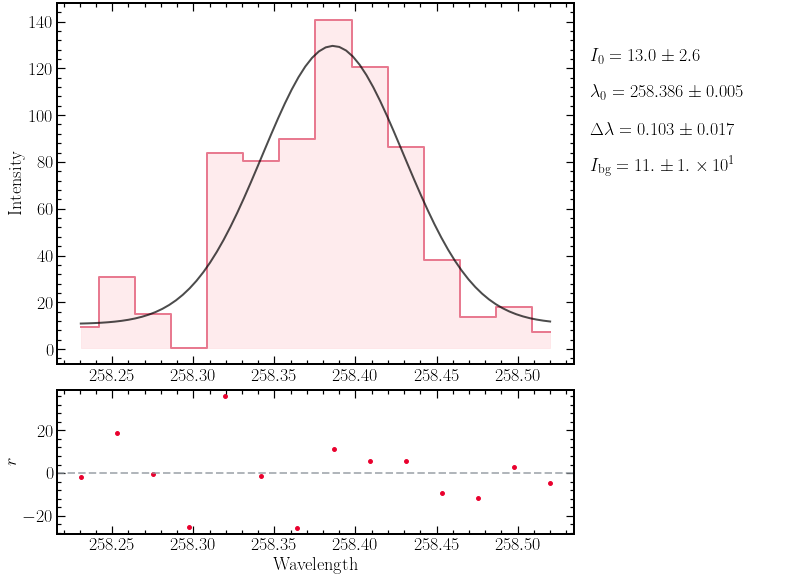

In [59]:
SiX_258_fitmodels[0].plot_single(-1)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in sqrt


Text(0, 0.5, 'Solar-Y [arcsec]')

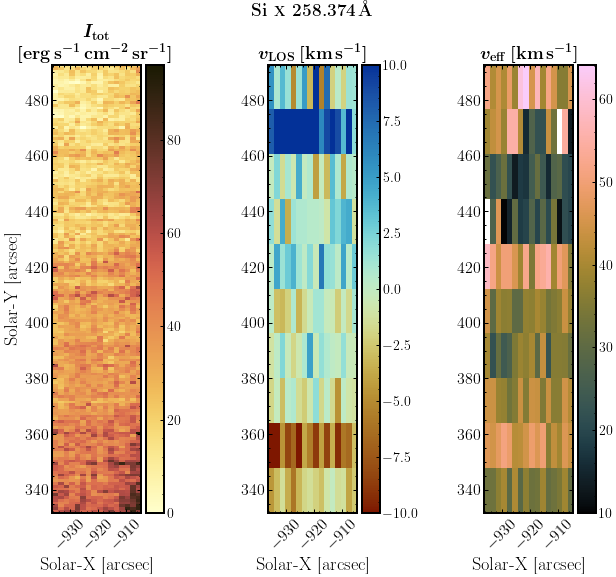

In [60]:
fig, axes = plt.subplots(1,3,figsize=(9,8),constrained_layout=True)

xstart, xend, ystart, yend = si_10_258_fit_res.meta["extent_arcsec"]
xaxis_arcsec, yaxis_arcsec = np.linspace(xstart+1,xstart+31,16), np.linspace(ystart, yend, 160)
yaxis_arcsec_bin = np.mean(yaxis_arcsec.reshape(-1,16),axis=1)

SiX_258_rest_wvl = 258.374
im_int = axes[0].pcolormesh(xaxis_arcsec,yaxis_arcsec,si_10_258_fit_res.fit["int"][:,:16,0],
                    shading="auto",rasterized=True,cmap=cmcm.lajolla)
plot_colorbar(im_int,axes[0], width="20%",bbox_to_anchor=(1.05, 0., 1, 1))
axes[0].set_title(r"$\boldsymbol{I_{\rm tot}}$" + "\n" + \
    r"$\boldsymbol{\mathrm{[erg\,s^{-1}\,cm^{-2}\,sr^{-1}]}}$",fontsize=18)

SiX_258_bin_vel = (SiX_258_bin_fit[:,:,0] - SiX_258_rest_wvl)/SiX_258_rest_wvl*const.c.cgs.value/1e5
SiX_258_bin_vel_cor = SiX_258_bin_vel - np.median(SiX_258_bin_vel,axis=0)
im_vel = axes[1].pcolormesh(xaxis_arcsec,yaxis_arcsec_bin,SiX_258_bin_vel_cor,
                    shading="auto",rasterized=True,cmap=cmcm.roma,vmin=-10,vmax=10)
plot_colorbar(im_vel,axes[1], width="20%",bbox_to_anchor=(1.05, 0., 1, 1))
axes[1].set_title(r"$\boldsymbol{v_{\rm LOS}}\,$" + \
    r"$\boldsymbol{\mathrm{[km\,s^{-1}]}}$",fontsize=18)

# slit_width = 0.062
slit_width = np.mean(si_10_258_fit_res.meta["slit_width"].reshape(-1,16),axis=1)
im_fwhm = axes[2].pcolormesh(xaxis_arcsec,yaxis_arcsec_bin,
        np.sqrt(SiX_258_bin_fit[:,:,2]**2 - slit_width[:,np.newaxis]**2)/SiX_258_rest_wvl \
                    *const.c.cgs.value/1e5/np.sqrt(4*np.log(2)),cmap=cmcm.batlowK,vmin=10)
plot_colorbar(im_fwhm,axes[2], width="20%",bbox_to_anchor=(1.05, 0., 1, 1))
axes[2].set_title(r"$\boldsymbol{v_{\rm eff}}\,$" + \
    r"$\boldsymbol{\mathrm{[km\,s^{-1}]}}$",fontsize=18)
fig.suptitle(r"\textbf{Si \textsc{x} 258.374\,\mbox{\AA}",fontsize=18)
for ax_ in axes:
    ax_.set_aspect(1)
    ax_.set_xlabel("Solar-X [arcsec]",fontsize=18)
    ax_.tick_params(axis="x",rotation=45)

axes[0].set_ylabel("Solar-Y [arcsec]",fontsize=18)


In [61]:
SiX_261_bin_fit = np.zeros((10,16,4))
SiX_261_slice = slice(672,688)
SiX_261_fitmodels = []
for ii in range(16):
    data_masked = np.copy(data_2_interp)
    data_masked[np.where(data_masked < -500)] = np.nan
    SiX_261_bin_ = data_masked[:,ii,SiX_261_slice]
    SiX_261_bin_ = np.nanmean(SiX_261_bin_.reshape(-1,16,SiX_261_slice.stop - SiX_261_slice.start),axis=1)

    SiX_261_bin_fit_model = SpectrumFitRow(data=SiX_261_bin_, wvl=data_cube_2.wavelength[0,ii*3,SiX_261_slice],line_number=1,
                                            line_wvl_init=[261.06],int_max_init=[3e2],fwhm_init=[0.08])
    # SiX_261_bin_fit_model.plot_fit(plot_fit=False)
    SiX_261_bin_fit_model.run_lse()
    SiX_261_fitmodels.append(SiX_261_bin_fit_model)
    SiX_261_bin_fit[:,ii,0] = SiX_261_bin_fit_model.line_wvl_fit[:,0]
    SiX_261_bin_fit[:,ii,1] = SiX_261_bin_fit_model.int_total_fit[:,0]
    SiX_261_bin_fit[:,ii,2] = SiX_261_bin_fit_model.fwhm_fit[:,0]
    SiX_261_bin_fit[:,ii,3] = SiX_261_bin_fit_model.int_cont_fit[:]

array([[<AxesSubplot:ylabel='Intensity'>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:ylabel='Intensity'>, <AxesSubplot:>,
        <AxesSubplot:xlabel='$\\textrm{Wavelength}$'>,
        <AxesSubplot:xlabel='$\\textrm{Wavelength}$'>],
       [<AxesSubplot:xlabel='$\\textrm{Wavelength}$', ylabel='Intensity'>,
        <AxesSubplot:xlabel='$\\textrm{Wavelength}$'>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

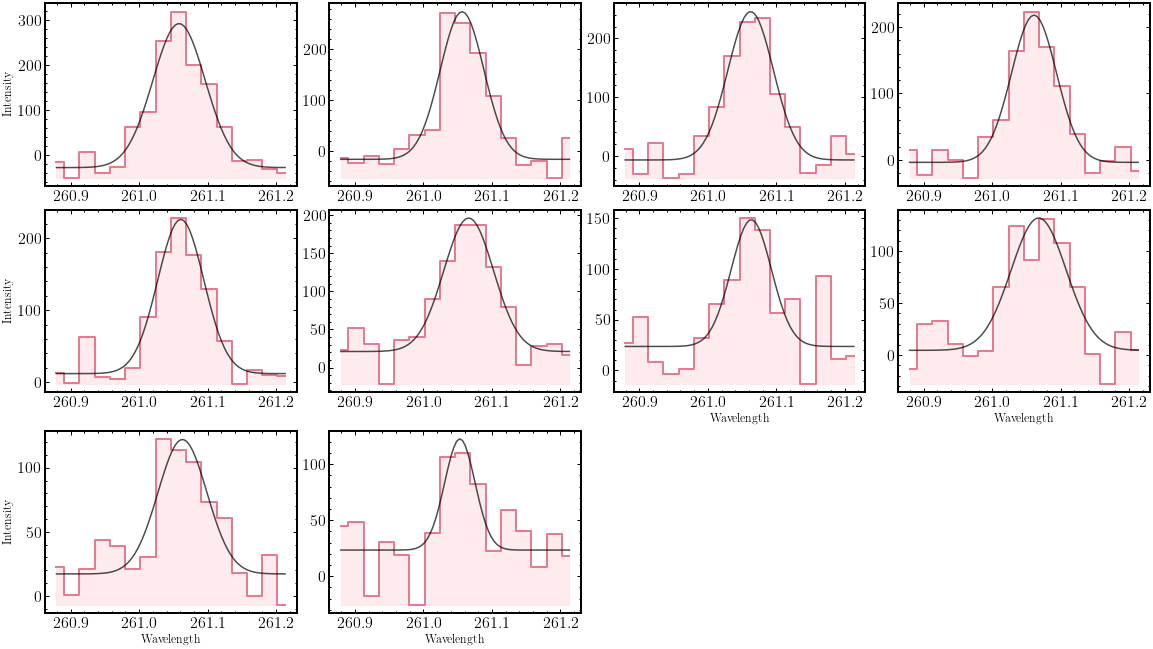

In [92]:
SiX_261_fitmodels[1].plot_fit()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in sqrt


Text(0, 0.5, 'Solar-Y [arcsec]')

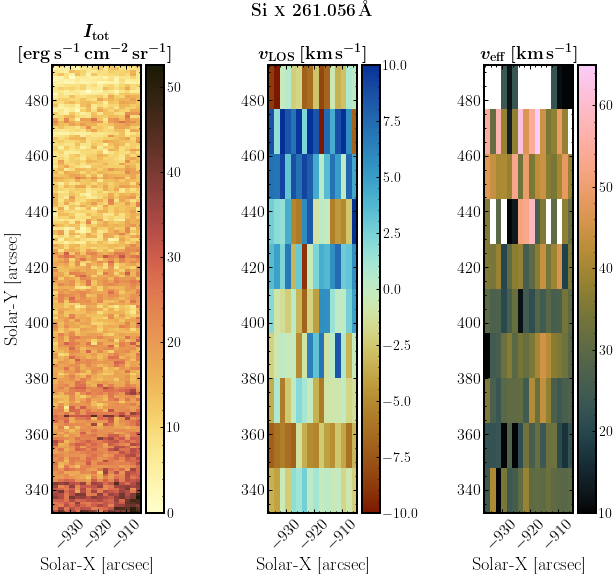

In [62]:
fig, axes = plt.subplots(1,3,figsize=(9,8),constrained_layout=True)

xstart, xend, ystart, yend = si_10_261_fit_res.meta["extent_arcsec"]
xaxis_arcsec, yaxis_arcsec = np.linspace(xstart+1,xstart+31,16), np.linspace(ystart, yend, 160)
yaxis_arcsec_bin = np.mean(yaxis_arcsec.reshape(-1,16),axis=1)

SiX_261_rest_wvl = 261.056
im_int = axes[0].pcolormesh(xaxis_arcsec,yaxis_arcsec,si_10_261_fit_res.fit["int"][:,:16,0],
                    shading="auto",rasterized=True,cmap=cmcm.lajolla)
plot_colorbar(im_int,axes[0], width="20%",bbox_to_anchor=(1.05, 0., 1, 1))
axes[0].set_title(r"$\boldsymbol{I_{\rm tot}}$" + "\n" + \
    r"$\boldsymbol{\mathrm{[erg\,s^{-1}\,cm^{-2}\,sr^{-1}]}}$",fontsize=18)

SiX_261_bin_vel = (SiX_261_bin_fit[:,:,0] - SiX_261_rest_wvl)/SiX_261_rest_wvl*const.c.cgs.value/1e5
SiX_261_bin_vel_cor = SiX_261_bin_vel - np.median(SiX_261_bin_vel,axis=0)
im_vel = axes[1].pcolormesh(xaxis_arcsec,yaxis_arcsec_bin,SiX_261_bin_vel_cor,
                    shading="auto",rasterized=True,cmap=cmcm.roma,vmin=-10,vmax=10)
plot_colorbar(im_vel,axes[1], width="20%",bbox_to_anchor=(1.05, 0., 1, 1))
axes[1].set_title(r"$\boldsymbol{v_{\rm LOS}}\,$" + \
    r"$\boldsymbol{\mathrm{[km\,s^{-1}]}}$",fontsize=18)

# slit_width = 0.062
slit_width = np.mean(si_10_261_fit_res.meta["slit_width"].reshape(-1,16),axis=1)
im_fwhm = axes[2].pcolormesh(xaxis_arcsec,yaxis_arcsec_bin,
        np.sqrt(SiX_261_bin_fit[:,:,2]**2 - slit_width[:,np.newaxis]**2)/SiX_261_rest_wvl \
                    *const.c.cgs.value/1e5/np.sqrt(4*np.log(2)),cmap=cmcm.batlowK,vmin=10,vmax=65)
plot_colorbar(im_fwhm,axes[2], width="20%",bbox_to_anchor=(1.05, 0., 1, 1))
axes[2].set_title(r"$\boldsymbol{v_{\rm eff}}\,$" + \
    r"$\boldsymbol{\mathrm{[km\,s^{-1}]}}$",fontsize=18)
fig.suptitle(r"\textbf{Si \textsc{x} 261.056\,\mbox{\AA}",fontsize=18)
for ax_ in axes:
    ax_.set_aspect(1)
    ax_.set_xlabel("Solar-X [arcsec]",fontsize=18)
    ax_.tick_params(axis="x",rotation=45)

axes[0].set_ylabel("Solar-Y [arcsec]",fontsize=18)


In [63]:
FeX_184_radcorr_hpw = 1.25465
FeX_184_radcorr_gdz = 1.35044
FeX_257_radcorr_hpw = 1.70066
FeX_257_radcorr_gdz = 2.89774
FeXI_188_radcorr_hpw = 0.979529
FeXI_188_radcorr_gdz = 1.44743
FeXI_257_radcorr_hpw = 1.69542
FeXI_257_radcorr_gdz = 2.87326
FeXII_186_radcorr_hpw = 1.07798
FeXII_186_radcorr_gdz = 1.40138
FeXII_192_radcorr_hpw = 0.833634
FeXII_192_radcorr_gdz = 1.12736
FeXII_195_radcorr_hpw = 0.874023
FeXII_195_radcorr_gdz = 1.00102
SiX_258_radcorr_hpw = 1.68540
SiX_258_radcorr_gdz = 2.79741
SiX_261_radcorr_hpw = 1.73463
SiX_261_radcorr_gdz = 2.67270
FeXIV_264_radcorr_hpw = 2.03844
FeXIV_264_radcorr_gdz = 2.46965

In [65]:
def chianti_interp_func(filename,diag="dens"):
    df_ratio = pd.read_csv(filename,skiprows=6,
                names=[diag,"ratio"],sep="\s+",index_col=False,dtype=np.float64)

    interp_func = interpolate.interp1d(df_ratio["ratio"].values, df_ratio[diag].values,kind="cubic",
                                    fill_value="extrapolate")

    return interp_func

In [66]:
FeXII_192_186_interp_func = chianti_interp_func("../../sav/CHIANTI/line_ratio/FeXII_192_186_dens.txt")

16.427189 16.857944


Text(0, 0.5, 'Solar-Y [arcsec]')

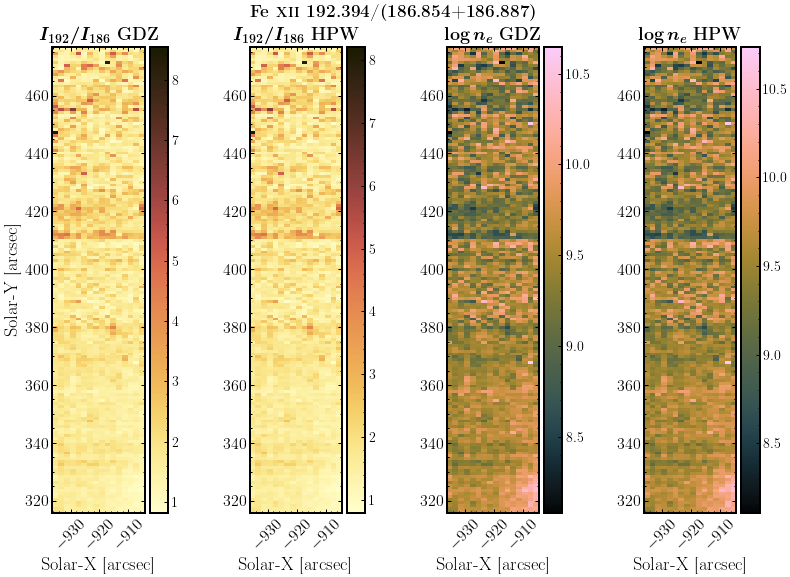

In [89]:
print(np.mean(fe_12_192_fit_res.meta["ccd_offset"][FeXII_192_slice]),
        np.mean(fe_12_186_fit_res.meta["ccd_offset"][FeXII_186_slice]))

fig, axes = plt.subplots(1,4,figsize=(11,8),constrained_layout=True)

int_ratio_gdz = fe_12_192_fit_res.fit["int"][:,:16,0]*FeXII_192_radcorr_gdz/ \
                (fe_12_186_fit_res.fit["int"][:,:16,0]*FeXII_186_radcorr_gdz)

int_ratio_hpw = fe_12_192_fit_res.fit["int"][:,:16,0]*FeXII_192_radcorr_hpw/ \
                (fe_12_186_fit_res.fit["int"][:,:16,0]*FeXII_186_radcorr_hpw)

xstart, xend, ystart, yend = fe_12_192_fit_res.meta["extent_arcsec"]
xaxis_arcsec, yaxis_arcsec = np.linspace(xstart+1,xstart+31,16), np.linspace(ystart, yend, 160)
yaxis_arcsec_bin = np.mean(yaxis_arcsec.reshape(-1,16),axis=1)

im_gdz_ratio = axes[0].pcolormesh(xaxis_arcsec,yaxis_arcsec,int_ratio_gdz,
                    shading="auto",rasterized=True,cmap=cmcm.lajolla)
plot_colorbar(im_gdz_ratio,axes[0], width="20%",bbox_to_anchor=(1.05, 0., 1, 1))
axes[0].set_title(r"$\boldsymbol{I_{192}/I_{186}}$ " + \
    r"\textbf{GDZ}",fontsize=18)

im_hpw_ratio = axes[1].pcolormesh(xaxis_arcsec,yaxis_arcsec,int_ratio_hpw,
                    shading="auto",rasterized=True,cmap=cmcm.lajolla)
plot_colorbar(im_hpw_ratio,axes[1], width="20%",bbox_to_anchor=(1.05, 0., 1, 1))
axes[1].set_title(r"$\boldsymbol{I_{192}/I_{186}}$ " + \
    r"\textbf{HPW}",fontsize=18)

im_gdz_density = axes[2].pcolormesh(xaxis_arcsec,yaxis_arcsec,FeXII_192_186_interp_func(int_ratio_gdz),
                    shading="auto",rasterized=True,cmap=cmcm.batlowK)
plot_colorbar(im_gdz_density,axes[2], width="20%",bbox_to_anchor=(1.05, 0., 1, 1))
axes[2].set_title(r"$\boldsymbol{\log n_e}$ " + \
    r"\textbf{GDZ}",fontsize=18)

im_hpw_density = axes[3].pcolormesh(xaxis_arcsec,yaxis_arcsec,FeXII_192_186_interp_func(int_ratio_hpw),
                    shading="auto",rasterized=True,cmap=cmcm.batlowK)
plot_colorbar(im_hpw_density,axes[3], width="20%",bbox_to_anchor=(1.05, 0., 1, 1))
axes[3].set_title(r"$\boldsymbol{\log n_e}$ " + \
    r"\textbf{HPW}",fontsize=18)

fig.suptitle(r"\textbf{Fe \textsc{xii} 192.394/(186.854+186.887)",fontsize=18)
for ax_ in axes:
    ax_.set_aspect(1)
    ax_.set_xlabel("Solar-X [arcsec]",fontsize=18)
    ax_.tick_params(axis="x",rotation=45)

axes[0].set_ylabel("Solar-Y [arcsec]",fontsize=18)

In [93]:
FeXII_195_186_interp_func = chianti_interp_func("../../sav/CHIANTI/line_ratio/FeXII_195_186_dens.txt")

16.212738 16.857944


Text(0, 0.5, 'Solar-Y [arcsec]')

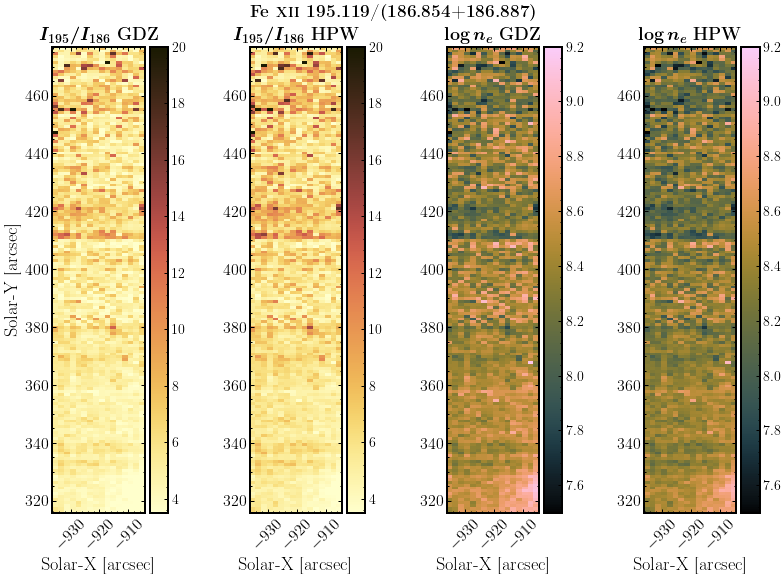

In [120]:
print(np.mean(fe_12_195_fit_res.meta["ccd_offset"][FeXII_195_slice]),
        np.mean(fe_12_186_fit_res.meta["ccd_offset"][FeXII_186_slice]))

fig, axes = plt.subplots(1,4,figsize=(11,8),constrained_layout=True)

int_ratio_gdz = fe_12_195_fit_res.fit["int"][:,:16,0]*FeXII_195_radcorr_gdz/ \
                (fe_12_186_fit_res.fit["int"][:,:16,0]*FeXII_186_radcorr_gdz)

int_ratio_hpw = fe_12_195_fit_res.fit["int"][:,:16,0]*FeXII_195_radcorr_hpw/ \
                (fe_12_186_fit_res.fit["int"][:,:16,0]*FeXII_186_radcorr_hpw)

xstart, xend, ystart, yend = fe_12_195_fit_res.meta["extent_arcsec"]
xaxis_arcsec, yaxis_arcsec = np.linspace(xstart+1,xstart+31,16), np.linspace(ystart, yend, 160)
yaxis_arcsec_bin = np.mean(yaxis_arcsec.reshape(-1,16),axis=1)

im_gdz_ratio = axes[0].pcolormesh(xaxis_arcsec,yaxis_arcsec,int_ratio_gdz,
                    shading="auto",rasterized=True,cmap=cmcm.lajolla,vmin=3.5,vmax=20)
plot_colorbar(im_gdz_ratio,axes[0], width="20%",bbox_to_anchor=(1.05, 0., 1, 1))
axes[0].set_title(r"$\boldsymbol{I_{195}/I_{186}}$ " + \
    r"\textbf{GDZ}",fontsize=18)

im_hpw_ratio = axes[1].pcolormesh(xaxis_arcsec,yaxis_arcsec,int_ratio_hpw,
                    shading="auto",rasterized=True,cmap=cmcm.lajolla,vmin=3.5,vmax=20)
plot_colorbar(im_hpw_ratio,axes[1], width="20%",bbox_to_anchor=(1.05, 0., 1, 1))
axes[1].set_title(r"$\boldsymbol{I_{195}/I_{186}}$ " + \
    r"\textbf{HPW}",fontsize=18)

im_gdz_density = axes[2].pcolormesh(xaxis_arcsec,yaxis_arcsec,FeXII_195_186_interp_func(int_ratio_gdz),
                    shading="auto",rasterized=True,cmap=cmcm.batlowK,vmin=7.5,vmax=9.2)
plot_colorbar(im_gdz_density,axes[2], width="20%",bbox_to_anchor=(1.05, 0., 1, 1))
axes[2].set_title(r"$\boldsymbol{\log n_e}$ " + \
    r"\textbf{GDZ}",fontsize=18)

im_hpw_density = axes[3].pcolormesh(xaxis_arcsec,yaxis_arcsec,FeXII_195_186_interp_func(int_ratio_hpw),
                    shading="auto",rasterized=True,cmap=cmcm.batlowK,vmin=7.5,vmax=9.2)
plot_colorbar(im_hpw_density,axes[3], width="20%",bbox_to_anchor=(1.05, 0., 1, 1))
axes[3].set_title(r"$\boldsymbol{\log n_e}$ " + \
    r"\textbf{HPW}",fontsize=18)

fig.suptitle(r"\textbf{Fe \textsc{xii} 195.119/(186.854+186.887)",fontsize=18)
for ax_ in axes:
    ax_.set_aspect(1)
    ax_.set_xlabel("Solar-X [arcsec]",fontsize=18)
    ax_.tick_params(axis="x",rotation=45)

axes[0].set_ylabel("Solar-Y [arcsec]",fontsize=18)

In [80]:
SiX_261_258_interp_func = chianti_interp_func("../../sav/CHIANTI/line_ratio/SiX_261_258_dens.txt")

-0.37322435 -0.16165508


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Text(0, 0.5, 'Solar-Y [arcsec]')

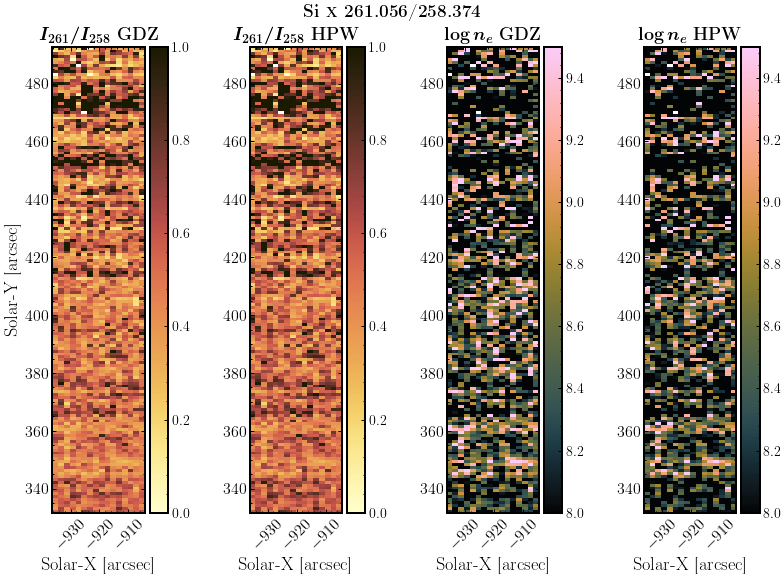

In [111]:
print(np.mean(si_10_261_fit_res.meta["ccd_offset"][SiX_261_slice]),
        np.mean(si_10_258_fit_res.meta["ccd_offset"][SiX_258_slice]))

fig, axes = plt.subplots(1,4,figsize=(11,8),constrained_layout=True)

int_ratio_gdz = si_10_261_fit_res.fit["int"][:,:16,0]*SiX_261_radcorr_gdz/ \
                (si_10_258_fit_res.fit["int"][:,:16,0]*SiX_258_radcorr_gdz)

int_ratio_hpw = si_10_261_fit_res.fit["int"][:,:16,0]*SiX_261_radcorr_hpw/ \
                (si_10_258_fit_res.fit["int"][:,:16,0]*SiX_258_radcorr_hpw)

xstart, xend, ystart, yend = si_10_261_fit_res.meta["extent_arcsec"]
xaxis_arcsec, yaxis_arcsec = np.linspace(xstart+1,xstart+31,16), np.linspace(ystart, yend, 160)
yaxis_arcsec_bin = np.mean(yaxis_arcsec.reshape(-1,16),axis=1)

im_gdz_ratio = axes[0].pcolormesh(xaxis_arcsec,yaxis_arcsec,int_ratio_gdz,
                    shading="auto",rasterized=True,cmap=cmcm.lajolla,vmin=0,vmax=1)
plot_colorbar(im_gdz_ratio,axes[0], width="20%",bbox_to_anchor=(1.05, 0., 1, 1))
axes[0].set_title(r"$\boldsymbol{I_{261}/I_{258}}$ " + \
    r"\textbf{GDZ}",fontsize=18)

im_hpw_ratio = axes[1].pcolormesh(xaxis_arcsec,yaxis_arcsec,int_ratio_hpw,
                    shading="auto",rasterized=True,cmap=cmcm.lajolla,vmin=0,vmax=1)
plot_colorbar(im_hpw_ratio,axes[1], width="20%",bbox_to_anchor=(1.05, 0., 1, 1))
axes[1].set_title(r"$\boldsymbol{I_{261}/I_{258}}$ " + \
    r"\textbf{HPW}",fontsize=18)

im_gdz_density = axes[2].pcolormesh(xaxis_arcsec,yaxis_arcsec,SiX_261_258_interp_func(int_ratio_gdz),
                    shading="auto",rasterized=True,cmap=cmcm.batlowK,vmin=8,vmax=9.5)
plot_colorbar(im_gdz_density,axes[2], width="20%",bbox_to_anchor=(1.05, 0., 1, 1))
axes[2].set_title(r"$\boldsymbol{\log n_e}$ " + \
    r"\textbf{GDZ}",fontsize=18)

im_hpw_density = axes[3].pcolormesh(xaxis_arcsec,yaxis_arcsec,SiX_261_258_interp_func(int_ratio_hpw),
                    shading="auto",rasterized=True,cmap=cmcm.batlowK,vmin=8,vmax=9.5)
plot_colorbar(im_hpw_density,axes[3], width="20%",bbox_to_anchor=(1.05, 0., 1, 1))
axes[3].set_title(r"$\boldsymbol{\log n_e}$ " + \
    r"\textbf{HPW}",fontsize=18)

fig.suptitle(r"\textbf{Si \textsc{x} 261.056/258.374",fontsize=18)
for ax_ in axes:
    ax_.set_aspect(1)
    ax_.set_xlabel("Solar-X [arcsec]",fontsize=18)
    ax_.tick_params(axis="x",rotation=45)

axes[0].set_ylabel("Solar-Y [arcsec]",fontsize=18)

-0.37322435 -0.16165508


Text(0, 0.5, 'Solar-Y [arcsec]')

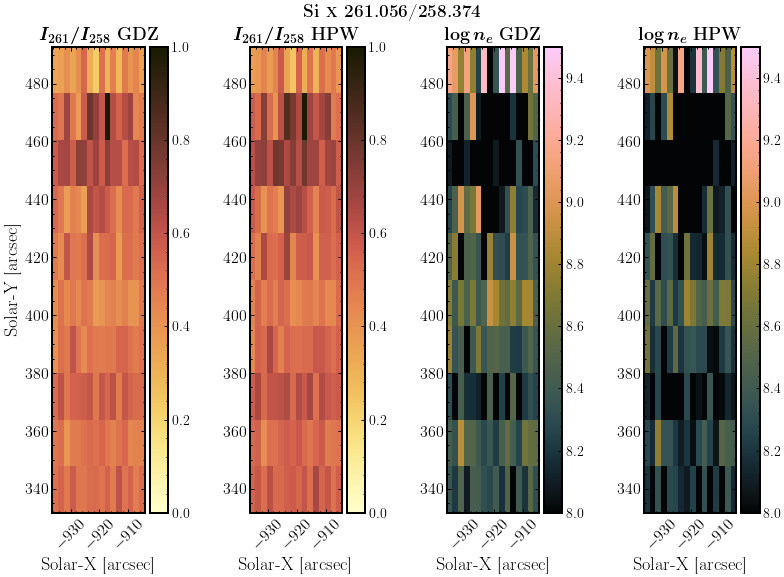

In [112]:
print(np.mean(si_10_261_fit_res.meta["ccd_offset"][SiX_261_slice]),
        np.mean(si_10_258_fit_res.meta["ccd_offset"][SiX_258_slice]))

fig, axes = plt.subplots(1,4,figsize=(11,8),constrained_layout=True)

int_ratio_gdz = SiX_261_bin_fit[:,:,1]*SiX_261_radcorr_gdz/ \
                (SiX_258_bin_fit[:,:,1]*SiX_258_radcorr_gdz)

int_ratio_hpw = SiX_261_bin_fit[:,:,1]*SiX_261_radcorr_hpw/ \
                (SiX_258_bin_fit[:,:,1]*SiX_258_radcorr_hpw)

xstart, xend, ystart, yend = si_10_261_fit_res.meta["extent_arcsec"]
xaxis_arcsec, yaxis_arcsec = np.linspace(xstart+1,xstart+31,16), np.linspace(ystart, yend, 160)
yaxis_arcsec_bin = np.mean(yaxis_arcsec.reshape(-1,16),axis=1)

im_gdz_ratio = axes[0].pcolormesh(xaxis_arcsec,yaxis_arcsec_bin,int_ratio_gdz,
                    shading="auto",rasterized=True,cmap=cmcm.lajolla,vmin=0,vmax=1)
plot_colorbar(im_gdz_ratio,axes[0], width="20%",bbox_to_anchor=(1.05, 0., 1, 1))
axes[0].set_title(r"$\boldsymbol{I_{261}/I_{258}}$ " + \
    r"\textbf{GDZ}",fontsize=18)

im_hpw_ratio = axes[1].pcolormesh(xaxis_arcsec,yaxis_arcsec_bin,int_ratio_hpw,
                    shading="auto",rasterized=True,cmap=cmcm.lajolla,vmin=0,vmax=1)
plot_colorbar(im_hpw_ratio,axes[1], width="20%",bbox_to_anchor=(1.05, 0., 1, 1))
axes[1].set_title(r"$\boldsymbol{I_{261}/I_{258}}$ " + \
    r"\textbf{HPW}",fontsize=18)

im_gdz_density = axes[2].pcolormesh(xaxis_arcsec,yaxis_arcsec_bin,SiX_261_258_interp_func(int_ratio_gdz),
                    shading="auto",rasterized=True,cmap=cmcm.batlowK,vmin=8,vmax=9.5)
plot_colorbar(im_gdz_density,axes[2], width="20%",bbox_to_anchor=(1.05, 0., 1, 1))
axes[2].set_title(r"$\boldsymbol{\log n_e}$ " + \
    r"\textbf{GDZ}",fontsize=18)

im_hpw_density = axes[3].pcolormesh(xaxis_arcsec,yaxis_arcsec_bin,SiX_261_258_interp_func(int_ratio_hpw),
                    shading="auto",rasterized=True,cmap=cmcm.batlowK,vmin=8,vmax=9.5)
plot_colorbar(im_hpw_density,axes[3], width="20%",bbox_to_anchor=(1.05, 0., 1, 1))
axes[3].set_title(r"$\boldsymbol{\log n_e}$ " + \
    r"\textbf{HPW}",fontsize=18)

fig.suptitle(r"\textbf{Si \textsc{x} 261.056/258.374",fontsize=18)
for ax_ in axes:
    ax_.set_aspect(1)
    ax_.set_xlabel("Solar-X [arcsec]",fontsize=18)
    ax_.tick_params(axis="x",rotation=45)

axes[0].set_ylabel("Solar-Y [arcsec]",fontsize=18)

16.755543 -0.179287


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Text(0, 0.5, 'Solar-Y [arcsec]')

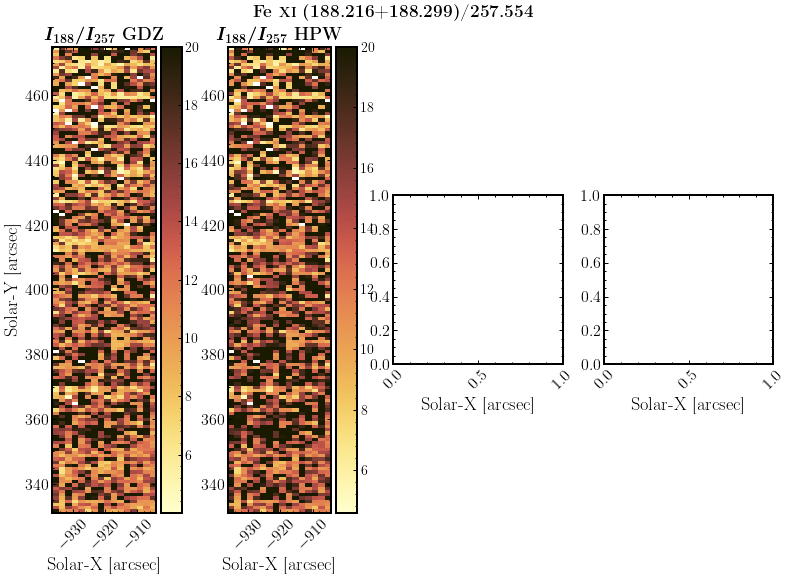

In [113]:
print(np.mean(fe_11_188_fit_res.meta["ccd_offset"][975:981]),
        np.mean(fe_11_257_fit_res.meta["ccd_offset"][565:575]))

fig, axes = plt.subplots(1,4,figsize=(11,8),constrained_layout=True)

int_ratio_gdz = np.sum(fe_11_188_fit_res.fit["int"][17:,:16,:],axis=2)*FeXI_188_radcorr_gdz/ \
                (fe_11_257_fit_res.fit["int"][:-17,:16,3]*FeXI_257_radcorr_gdz)

int_ratio_hpw = np.sum(fe_11_188_fit_res.fit["int"][17:,:16,:],axis=2)*FeXI_188_radcorr_hpw/ \
                (fe_11_257_fit_res.fit["int"][:-17,:16,3]*FeXI_257_radcorr_hpw)

xstart, xend, ystart, yend = fe_11_188_fit_res.meta["extent_arcsec"]
xaxis_arcsec, yaxis_arcsec = np.linspace(xstart+1,xstart+31,16), np.linspace(ystart+17, yend, 160-17)

im_gdz_ratio = axes[0].pcolormesh(xaxis_arcsec,yaxis_arcsec,int_ratio_gdz,
                    shading="auto",rasterized=True,cmap=cmcm.lajolla,vmax=20)
plot_colorbar(im_gdz_ratio,axes[0], width="20%",bbox_to_anchor=(1.05, 0., 1, 1))
axes[0].set_title(r"$\boldsymbol{I_{188}/I_{257}}$ " + \
    r"\textbf{GDZ}",fontsize=18)

im_hpw_ratio = axes[1].pcolormesh(xaxis_arcsec,yaxis_arcsec,int_ratio_hpw,
                    shading="auto",rasterized=True,cmap=cmcm.lajolla,vmax=20)
plot_colorbar(im_hpw_ratio,axes[1], width="20%",bbox_to_anchor=(1.05, 0., 1, 1))
axes[1].set_title(r"$\boldsymbol{I_{188}/I_{257}}$ " + \
    r"\textbf{HPW}",fontsize=18)

# im_gdz_density = axes[2].pcolormesh(xaxis_arcsec,yaxis_arcsec,FeXI_188_257_interp_func(int_ratio_gdz),
#                     shading="auto",rasterized=True,cmap=cmcm.batlowK,vmin=8,vmax=11)
# plot_colorbar(im_gdz_density,axes[2], width="20%",bbox_to_anchor=(1.05, 0., 1, 1))
# axes[2].set_title(r"$\boldsymbol{\log n_e}$ " + \
#     r"\textbf{GDZ}",fontsize=18)

# im_hpw_density = axes[3].pcolormesh(xaxis_arcsec,yaxis_arcsec,FeXI_188_257_interp_func(int_ratio_hpw),
#                     shading="auto",rasterized=True,cmap=cmcm.batlowK,vmin=8,vmax=11)
# plot_colorbar(im_hpw_density,axes[3], width="20%",bbox_to_anchor=(1.05, 0., 1, 1))
# axes[3].set_title(r"$\boldsymbol{\log n_e}$ " + \
#     r"\textbf{HPW}",fontsize=18)

fig.suptitle(r"\textbf{Fe \textsc{xi} (188.216+188.299)/257.554",fontsize=18)
for ax_ in axes:
    ax_.set_aspect(1)
    ax_.set_xlabel("Solar-X [arcsec]",fontsize=18)
    ax_.tick_params(axis="x",rotation=45)

axes[0].set_ylabel("Solar-Y [arcsec]",fontsize=18)

In [130]:
FeX_184_257_interp_func_85 = chianti_interp_func("../../sav/CHIANTI/line_ratio/FeX_184_257_temp_85.txt")
FeX_184_257_interp_func_90 = chianti_interp_func("../../sav/CHIANTI/line_ratio/FeX_184_257_temp_90.txt")
FeX_184_257_interp_func_95 = chianti_interp_func("../../sav/CHIANTI/line_ratio/FeX_184_257_temp_95.txt")

16.755543 -0.179287


Text(0, 0.5, 'Solar-Y [arcsec]')

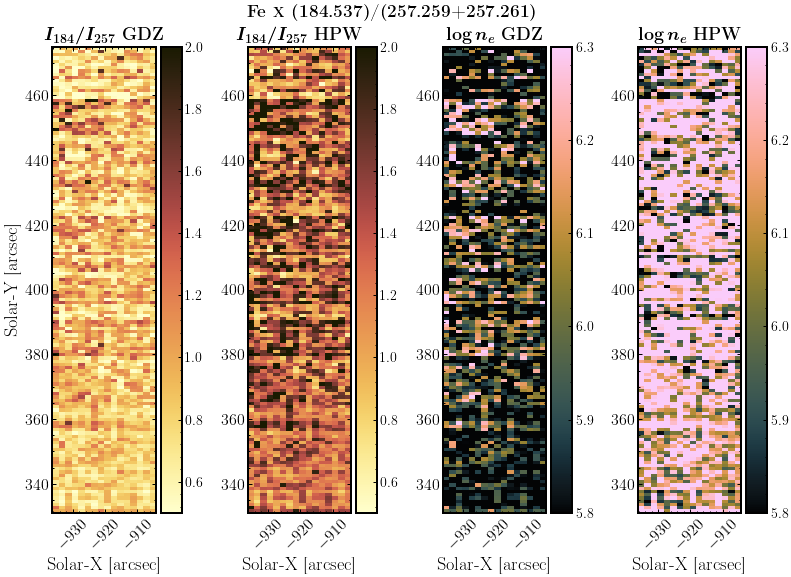

In [129]:
print(np.mean(fe_10_184_fit_res.meta["ccd_offset"][975:981]),
        np.mean(fe_10_257_fit_res.meta["ccd_offset"][565:575]))

fig, axes = plt.subplots(1,4,figsize=(11,8),constrained_layout=True)

int_ratio_gdz = fe_10_184_fit_res.fit["int"][17:,:16,0]*FeX_184_radcorr_gdz/ \
                (fe_10_257_fit_res.fit["int"][:-17,:16,1]*FeX_257_radcorr_gdz)

int_ratio_hpw = fe_10_184_fit_res.fit["int"][17:,:16,0]*FeX_184_radcorr_hpw/ \
                (fe_10_257_fit_res.fit["int"][:-17,:16,1]*FeX_257_radcorr_hpw)

xstart, xend, ystart, yend = fe_10_184_fit_res.meta["extent_arcsec"]
xaxis_arcsec, yaxis_arcsec = np.linspace(xstart+1,xstart+31,16), np.linspace(ystart+17, yend, 160-17)

im_gdz_ratio = axes[0].pcolormesh(xaxis_arcsec,yaxis_arcsec,int_ratio_gdz,
                    shading="auto",rasterized=True,cmap=cmcm.lajolla,vmin=0.5,vmax=2)
plot_colorbar(im_gdz_ratio,axes[0], width="20%",bbox_to_anchor=(1.05, 0., 1, 1))
axes[0].set_title(r"$\boldsymbol{I_{184}/I_{257}}$ " + \
    r"\textbf{GDZ}",fontsize=18)

im_hpw_ratio = axes[1].pcolormesh(xaxis_arcsec,yaxis_arcsec,int_ratio_hpw,
                    shading="auto",rasterized=True,cmap=cmcm.lajolla,vmin=0.5,vmax=2)
plot_colorbar(im_hpw_ratio,axes[1], width="20%",bbox_to_anchor=(1.05, 0., 1, 1))
axes[1].set_title(r"$\boldsymbol{I_{184}/I_{257}}$ " + \
    r"\textbf{HPW}",fontsize=18)

im_gdz_density = axes[2].pcolormesh(xaxis_arcsec,yaxis_arcsec,FeX_184_257_interp_func_85(int_ratio_gdz),
                    shading="auto",rasterized=True,cmap=cmcm.batlowK,vmin=5.8,vmax=6.3)
plot_colorbar(im_gdz_density,axes[2], width="20%",bbox_to_anchor=(1.05, 0., 1, 1))
axes[2].set_title(r"$\boldsymbol{\log n_e}$ " + \
    r"\textbf{GDZ}",fontsize=18)

im_hpw_density = axes[3].pcolormesh(xaxis_arcsec,yaxis_arcsec,FeX_184_257_interp_func_85(int_ratio_hpw),
                    shading="auto",rasterized=True,cmap=cmcm.batlowK,vmin=5.8,vmax=6.3)
plot_colorbar(im_hpw_density,axes[3], width="20%",bbox_to_anchor=(1.05, 0., 1, 1))
axes[3].set_title(r"$\boldsymbol{\log n_e}$ " + \
    r"\textbf{HPW}",fontsize=18)

fig.suptitle(r"\textbf{Fe \textsc{x} (184.537)/(257.259+257.261)",fontsize=18)
for ax_ in axes:
    ax_.set_aspect(1)
    ax_.set_xlabel("Solar-X [arcsec]",fontsize=18)
    ax_.tick_params(axis="x",rotation=45)

axes[0].set_ylabel("Solar-Y [arcsec]",fontsize=18)

16.755543 -0.179287


Text(0, 0.5, 'Solar-Y [arcsec]')

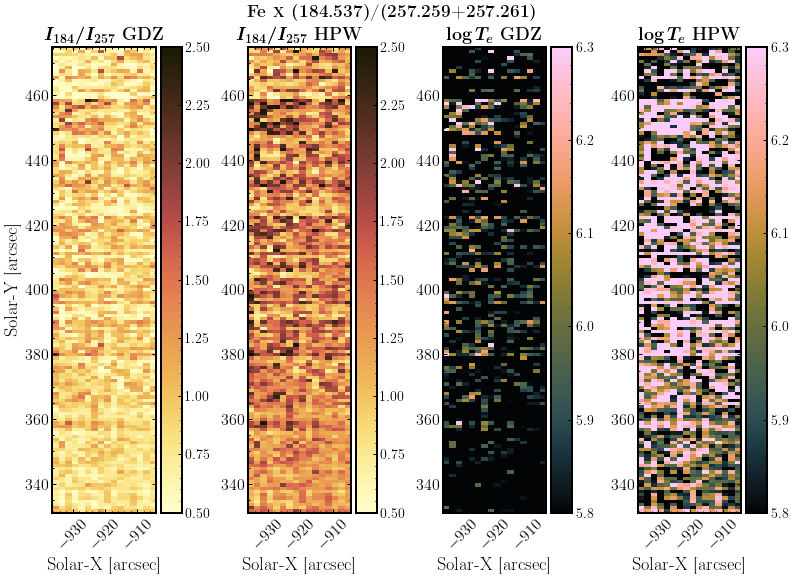

In [133]:
print(np.mean(fe_10_184_fit_res.meta["ccd_offset"][975:981]),
        np.mean(fe_10_257_fit_res.meta["ccd_offset"][565:575]))

fig, axes = plt.subplots(1,4,figsize=(11,8),constrained_layout=True)

int_ratio_gdz = fe_10_184_fit_res.fit["int"][17:,:16,0]*FeX_184_radcorr_gdz/ \
                (fe_10_257_fit_res.fit["int"][:-17,:16,1]*FeX_257_radcorr_gdz)

int_ratio_hpw = fe_10_184_fit_res.fit["int"][17:,:16,0]*FeX_184_radcorr_hpw/ \
                (fe_10_257_fit_res.fit["int"][:-17,:16,1]*FeX_257_radcorr_hpw)

xstart, xend, ystart, yend = fe_10_184_fit_res.meta["extent_arcsec"]
xaxis_arcsec, yaxis_arcsec = np.linspace(xstart+1,xstart+31,16), np.linspace(ystart+17, yend, 160-17)

im_gdz_ratio = axes[0].pcolormesh(xaxis_arcsec,yaxis_arcsec,int_ratio_gdz,
                    shading="auto",rasterized=True,cmap=cmcm.lajolla,vmin=0.5,vmax=2.5)
plot_colorbar(im_gdz_ratio,axes[0], width="20%",bbox_to_anchor=(1.05, 0., 1, 1))
axes[0].set_title(r"$\boldsymbol{I_{184}/I_{257}}$ " + \
    r"\textbf{GDZ}",fontsize=18)

im_hpw_ratio = axes[1].pcolormesh(xaxis_arcsec,yaxis_arcsec,int_ratio_hpw,
                    shading="auto",rasterized=True,cmap=cmcm.lajolla,vmin=0.5,vmax=2.5)
plot_colorbar(im_hpw_ratio,axes[1], width="20%",bbox_to_anchor=(1.05, 0., 1, 1))
axes[1].set_title(r"$\boldsymbol{I_{184}/I_{257}}$ " + \
    r"\textbf{HPW}",fontsize=18)

im_gdz_density = axes[2].pcolormesh(xaxis_arcsec,yaxis_arcsec,FeX_184_257_interp_func_90(int_ratio_gdz),
                    shading="auto",rasterized=True,cmap=cmcm.batlowK,vmin=5.8,vmax=6.3)
plot_colorbar(im_gdz_density,axes[2], width="20%",bbox_to_anchor=(1.05, 0., 1, 1))
axes[2].set_title(r"$\boldsymbol{\log T_e}$ " + \
    r"\textbf{GDZ}",fontsize=18)

im_hpw_density = axes[3].pcolormesh(xaxis_arcsec,yaxis_arcsec,FeX_184_257_interp_func_90(int_ratio_hpw),
                    shading="auto",rasterized=True,cmap=cmcm.batlowK,vmin=5.8,vmax=6.3)
plot_colorbar(im_hpw_density,axes[3], width="20%",bbox_to_anchor=(1.05, 0., 1, 1))
axes[3].set_title(r"$\boldsymbol{\log T_e}$ " + \
    r"\textbf{HPW}",fontsize=18)

fig.suptitle(r"\textbf{Fe \textsc{x} (184.537)/(257.259+257.261)",fontsize=18)
for ax_ in axes:
    ax_.set_aspect(1)
    ax_.set_xlabel("Solar-X [arcsec]",fontsize=18)
    ax_.tick_params(axis="x",rotation=45)

axes[0].set_ylabel("Solar-Y [arcsec]",fontsize=18)

16.755543 -0.179287


Text(0, 0.5, 'Solar-Y [arcsec]')

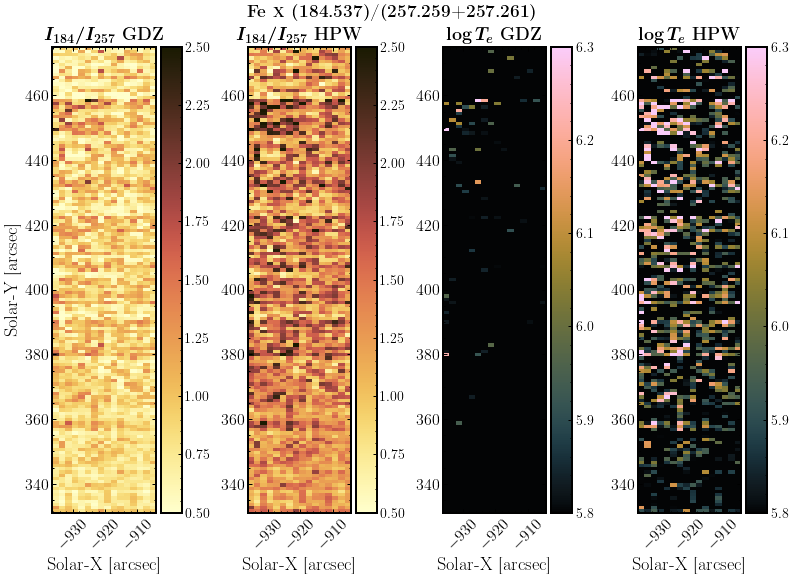

In [134]:
print(np.mean(fe_10_184_fit_res.meta["ccd_offset"][975:981]),
        np.mean(fe_10_257_fit_res.meta["ccd_offset"][565:575]))

fig, axes = plt.subplots(1,4,figsize=(11,8),constrained_layout=True)

int_ratio_gdz = fe_10_184_fit_res.fit["int"][17:,:16,0]*FeX_184_radcorr_gdz/ \
                (fe_10_257_fit_res.fit["int"][:-17,:16,1]*FeX_257_radcorr_gdz)

int_ratio_hpw = fe_10_184_fit_res.fit["int"][17:,:16,0]*FeX_184_radcorr_hpw/ \
                (fe_10_257_fit_res.fit["int"][:-17,:16,1]*FeX_257_radcorr_hpw)

xstart, xend, ystart, yend = fe_10_184_fit_res.meta["extent_arcsec"]
xaxis_arcsec, yaxis_arcsec = np.linspace(xstart+1,xstart+31,16), np.linspace(ystart+17, yend, 160-17)

im_gdz_ratio = axes[0].pcolormesh(xaxis_arcsec,yaxis_arcsec,int_ratio_gdz,
                    shading="auto",rasterized=True,cmap=cmcm.lajolla,vmin=0.5,vmax=2.5)
plot_colorbar(im_gdz_ratio,axes[0], width="20%",bbox_to_anchor=(1.05, 0., 1, 1))
axes[0].set_title(r"$\boldsymbol{I_{184}/I_{257}}$ " + \
    r"\textbf{GDZ}",fontsize=18)

im_hpw_ratio = axes[1].pcolormesh(xaxis_arcsec,yaxis_arcsec,int_ratio_hpw,
                    shading="auto",rasterized=True,cmap=cmcm.lajolla,vmin=0.5,vmax=2.5)
plot_colorbar(im_hpw_ratio,axes[1], width="20%",bbox_to_anchor=(1.05, 0., 1, 1))
axes[1].set_title(r"$\boldsymbol{I_{184}/I_{257}}$ " + \
    r"\textbf{HPW}",fontsize=18)

im_gdz_density = axes[2].pcolormesh(xaxis_arcsec,yaxis_arcsec,FeX_184_257_interp_func_95(int_ratio_gdz),
                    shading="auto",rasterized=True,cmap=cmcm.batlowK,vmin=5.8,vmax=6.3)
plot_colorbar(im_gdz_density,axes[2], width="20%",bbox_to_anchor=(1.05, 0., 1, 1))
axes[2].set_title(r"$\boldsymbol{\log T_e}$ " + \
    r"\textbf{GDZ}",fontsize=18)

im_hpw_density = axes[3].pcolormesh(xaxis_arcsec,yaxis_arcsec,FeX_184_257_interp_func_95(int_ratio_hpw),
                    shading="auto",rasterized=True,cmap=cmcm.batlowK,vmin=5.8,vmax=6.3)
plot_colorbar(im_hpw_density,axes[3], width="20%",bbox_to_anchor=(1.05, 0., 1, 1))
axes[3].set_title(r"$\boldsymbol{\log T_e}$ " + \
    r"\textbf{HPW}",fontsize=18)

fig.suptitle(r"\textbf{Fe \textsc{x} (184.537)/(257.259+257.261)",fontsize=18)
for ax_ in axes:
    ax_.set_aspect(1)
    ax_.set_xlabel("Solar-X [arcsec]",fontsize=18)
    ax_.tick_params(axis="x",rotation=45)

axes[0].set_ylabel("Solar-Y [arcsec]",fontsize=18)